In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
from sklearn.linear_model import LinearRegression


In [2]:
train = pd.read_csv('./train.csv')

In [3]:
train.head()

ID             datetime  temperature  var1  pressure  windspeed var2  \
0   0  2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1   1  2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2   2  2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3   3  2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   
4   4  2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600    A   

   electricity_consumption  
0                    216.0  
1                    210.0  
2                    225.0  
3                    216.0  
4                    222.0

In [4]:
train.describe()

ID   temperature          var1      pressure     windspeed  \
count  26496.000000  26496.000000  26496.000000  26496.000000  26496.000000   
mean   17455.500000      5.098989     -1.916233    986.450615     23.959956   
std    10122.873673      8.682860     10.424860     12.002647     48.280321   
min        0.000000    -17.100000    -32.900000    953.000000      1.075000   
25%     8717.750000     -2.900000    -10.700000    978.000000      3.155000   
50%    17435.500000      6.400000     -1.400000    986.000000      6.545000   
75%    26177.250000     12.100000      7.900000    995.000000     22.260000   
max    34895.000000     23.600000     18.600000   1024.000000    586.600000   

       electricity_consumption  
count             26496.000000  
mean                298.359601  
std                 108.020555  
min                 174.000000  
25%                 219.000000  
50%                 267.000000  
75%                 342.000000  
max                1386.000000

array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'var1'}>],
       [<AxesSubplot:title={'center':'pressure'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'electricity_consumption'}>,
        <AxesSubplot:>]], dtype=object)

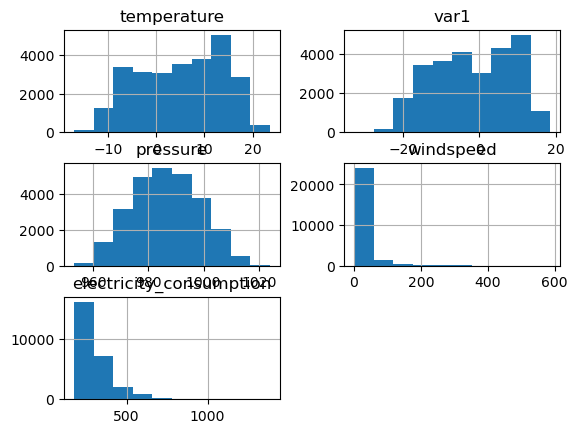

In [5]:
train.hist(['temperature','var1','pressure','windspeed','electricity_consumption'])

(array([1987., 6943., 4856., 3471., 3204., 2770., 1671.,  865.,  584.,
         145.]),
 array([0.07232066, 0.70252291, 1.33272516, 1.96292741, 2.59312966,
        3.22333191, 3.85353416, 4.48373641, 5.11393866, 5.74414091,
        6.37434316]),
 <BarContainer object of 10 artists>)

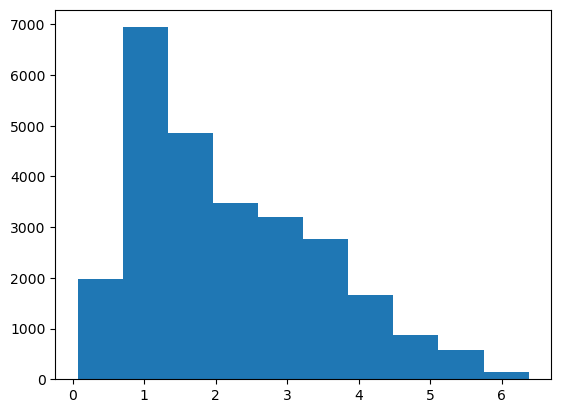

In [6]:
plt.hist(np.log(train['windspeed']))

(array([5623., 6951., 6120., 4090., 2004., 1125.,  455.,  104.,   14.,
          10.]),
 array([5.1590553 , 5.36656749, 5.57407968, 5.78159186, 5.98910405,
        6.19661624, 6.40412843, 6.61164062, 6.8191528 , 7.02666499,
        7.23417718]),
 <BarContainer object of 10 artists>)

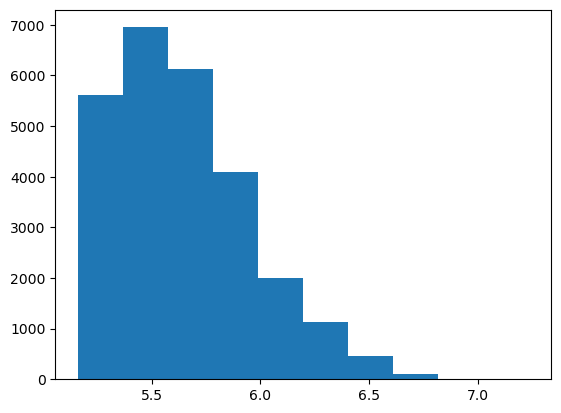

In [7]:
plt.hist(np.log(train['electricity_consumption']))

In [8]:
train['ec'] = np.log(train['electricity_consumption'])
train['ws'] = np.log(train['windspeed'])

<AxesSubplot:xlabel='ws', ylabel='ec'>

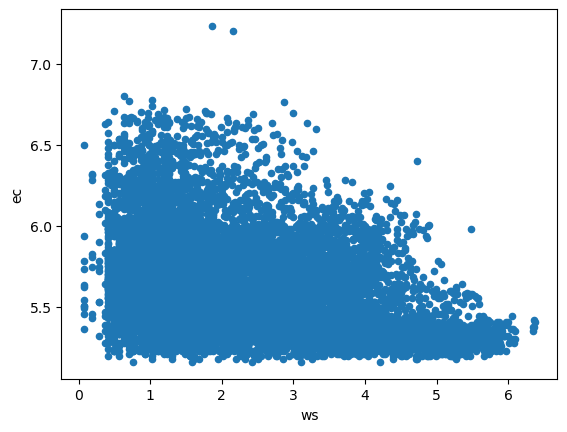

In [9]:
train[0:10000].plot.scatter(x='ws',y='ec')

In [10]:
train.corr(method='pearson')

ID  temperature      var1  pressure  windspeed  \
ID                       1.000000     0.074134  0.055589 -0.011708  -0.081535   
temperature              0.074134     1.000000  0.811421 -0.723939  -0.162093   
var1                     0.055589     0.811421  1.000000 -0.680821  -0.292305   
pressure                -0.011708    -0.723939 -0.680821  1.000000   0.171369   
windspeed               -0.081535    -0.162093 -0.292305  0.171369   1.000000   
electricity_consumption -0.009491    -0.117254  0.133914  0.000907  -0.238883   
ec                      -0.008650    -0.076493  0.193445 -0.038735  -0.278174   
ws                      -0.091724    -0.036442 -0.241529  0.086190   0.762430   

                         electricity_consumption        ec        ws  
ID                                     -0.009491 -0.008650 -0.091724  
temperature                            -0.117254 -0.076493 -0.036442  
var1                                    0.133914  0.193445 -0.241529  
pressure                                0.000907 -0.038735  0.086190  
windspeed                              -0.238883 -0.278174  0.762430  
electricity_consumption                 1.000000  0.975914 -0.301689  
ec                                      0.975914  1.000000 -0.333496  
ws                                     -0.301689 -0.333496  1.000000

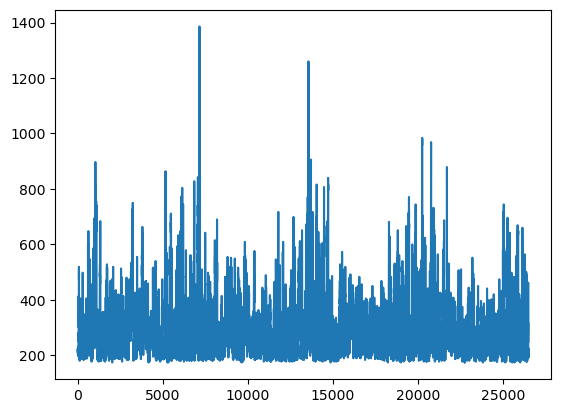

In [11]:
plt.plot(range(0,len(train)),'electricity_consumption',data=train)

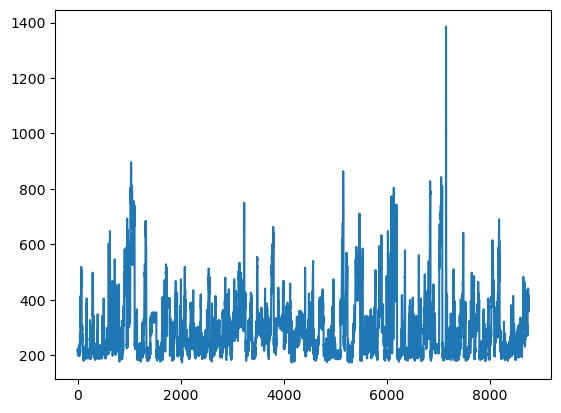

In [12]:
plt.plot(range(0,24*365),train['electricity_consumption'][0:24*365])

In [13]:
len(train)

26496

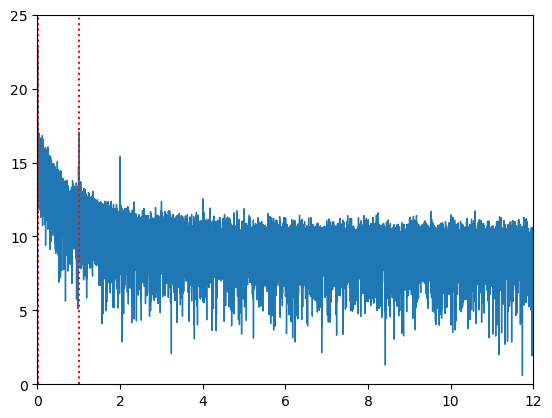

In [14]:
x = train['var1']
dt = 3600
N = len(x)
T = N*dt
xf = np.fft.fft(x-x.mean())
Sxx = 2*dt**2/T*(xf*xf.conj())
Sxx = Sxx[:int(len(x)/2)]
df = 1/T
fNQ = 1/dt/2
faxis = np.arange(0,fNQ,df)
plt.plot(faxis*3600*24, np.log(Sxx.real), linewidth=1)
plt.xlim([0,12])
plt.ylim([0,25])
plt.axvline(x=1,color='r',linestyle=':')
plt.axvline(x=1/365,color='r',linestyle=':')


In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])


In [16]:
train['hour'] = train['datetime'].dt.hour
train['month'] = train['datetime'].dt.month

(-1.0, 25.0)

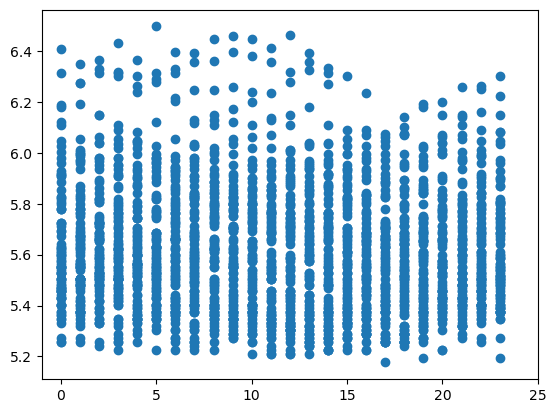

In [17]:
# fig, ax = 
trn2 = train[train['month'] == 1]
trn2.head()
plt.scatter('hour','ec',data=trn2)
plt.xlim([-1,25])
# plt.ylim([100,1400])

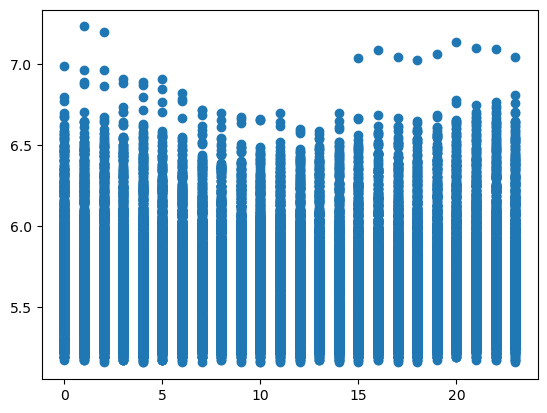

In [18]:
plt.scatter('hour','ec',data=train)

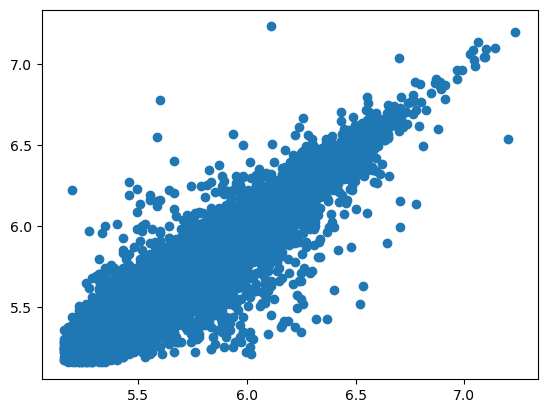

In [19]:
plt.scatter(train['ec'],train['ec'].shift(-1))

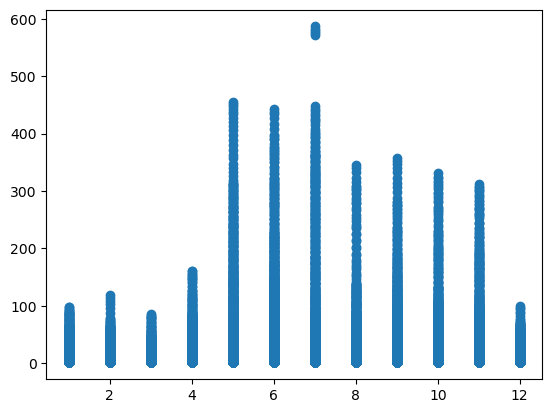

In [20]:
plt.scatter('month','windspeed',data=train)

In [21]:
train['ec_shift'] = train['ec'].shift(2)
train.head()

ID            datetime  temperature  var1  pressure  windspeed var2  \
0   0 2013-07-01 00:00:00        -11.4 -17.1    1003.0    571.910    A   
1   1 2013-07-01 01:00:00        -12.1 -19.3     996.0    575.040    A   
2   2 2013-07-01 02:00:00        -12.9 -20.0    1000.0    578.435    A   
3   3 2013-07-01 03:00:00        -11.4 -17.1     995.0    582.580    A   
4   4 2013-07-01 04:00:00        -11.4 -19.3    1005.0    586.600    A   

   electricity_consumption        ec        ws  hour  month  ec_shift  
0                    216.0  5.375278  6.348982     0      7       NaN  
1                    210.0  5.347108  6.354440     1      7       NaN  
2                    225.0  5.416100  6.360326     2      7  5.375278  
3                    216.0  5.375278  6.367467     3      7  5.347108  
4                    222.0  5.402677  6.374343     4      7  5.416100

In [22]:
train.to_csv('./here.csv')

In [23]:
train.corr(method='pearson')

ID  temperature      var1  pressure  windspeed  \
ID                       1.000000     0.074134  0.055589 -0.011708  -0.081535   
temperature              0.074134     1.000000  0.811421 -0.723939  -0.162093   
var1                     0.055589     0.811421  1.000000 -0.680821  -0.292305   
pressure                -0.011708    -0.723939 -0.680821  1.000000   0.171369   
windspeed               -0.081535    -0.162093 -0.292305  0.171369   1.000000   
electricity_consumption -0.009491    -0.117254  0.133914  0.000907  -0.238883   
ec                      -0.008650    -0.076493  0.193445 -0.038735  -0.278174   
ws                      -0.091724    -0.036442 -0.241529  0.086190   0.762430   
hour                     0.000684     0.154194 -0.021886 -0.033808   0.054145   
month                   -0.127175    -0.185422 -0.313373  0.044578   0.077188   
ec_shift                -0.008507    -0.069348  0.187813 -0.040499  -0.269912   

                         electricity_consumption        ec        ws  \
ID                                     -0.009491 -0.008650 -0.091724   
temperature                            -0.117254 -0.076493 -0.036442   
var1                                    0.133914  0.193445 -0.241529   
pressure                                0.000907 -0.038735  0.086190   
windspeed                              -0.238883 -0.278174  0.762430   
electricity_consumption                 1.000000  0.975914 -0.301689   
ec                                      0.975914  1.000000 -0.333496   
ws                                     -0.301689 -0.333496  1.000000   
hour                                   -0.021404 -0.025125  0.147301   
month                                   0.040761  0.044182  0.106822   
ec_shift                                0.890672  0.907679 -0.299584   

                                 hour         month  ec_shift  
ID                       6.838293e-04 -1.271748e-01 -0.008507  
temperature              1.541935e-01 -1.854224e-01 -0.069348  
var1                    -2.188607e-02 -3.133730e-01  0.187813  
pressure                -3.380843e-02  4.457814e-02 -0.040499  
windspeed                5.414530e-02  7.718785e-02 -0.269912  
electricity_consumption -2.140386e-02  4.076093e-02  0.890672  
ec                      -2.512463e-02  4.418155e-02  0.907679  
ws                       1.473006e-01  1.068223e-01 -0.299584  
hour                     1.000000e+00  2.950785e-16 -0.063412  
month                    2.950785e-16  1.000000e+00  0.044344  
ec_shift                -6.341227e-02  4.434416e-02  1.000000

In [24]:
(train['temperature'].mean() < train['var1']).sum()

8739

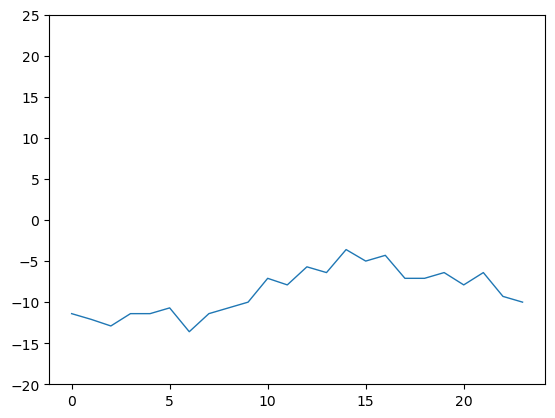

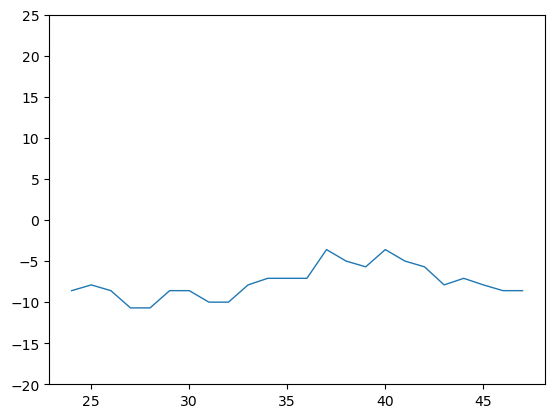

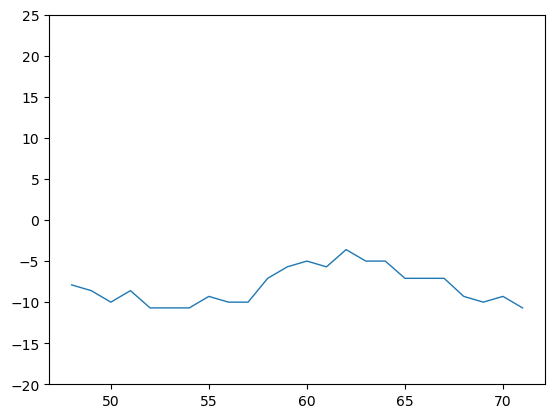

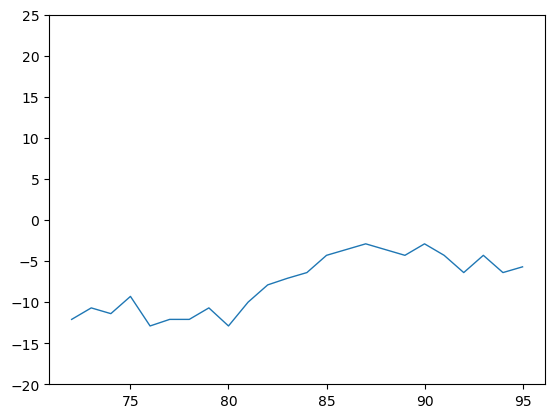

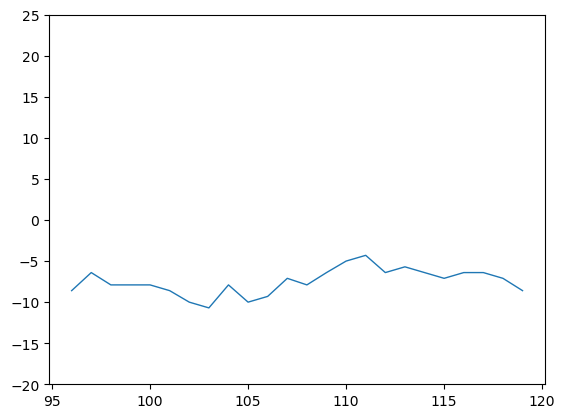

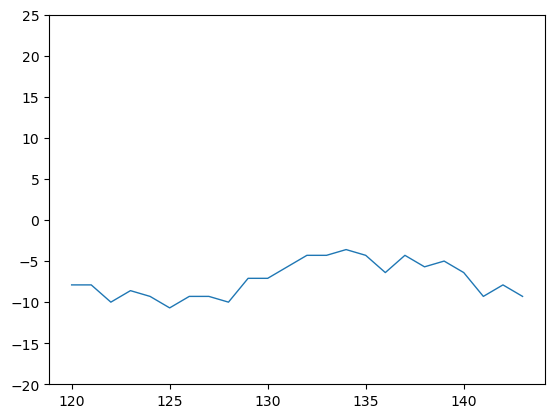

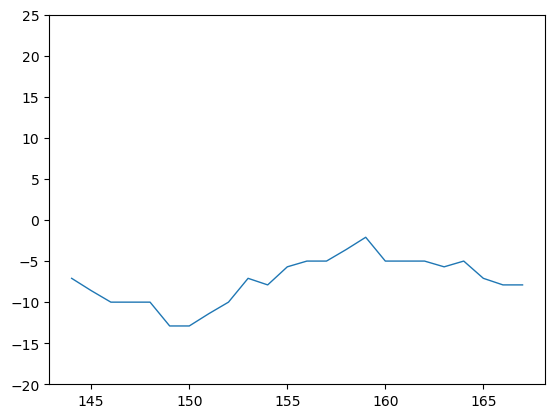

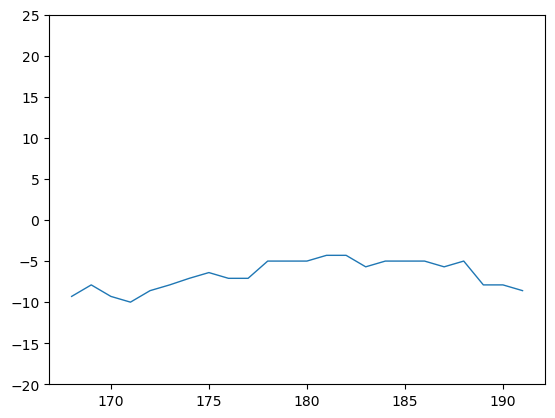

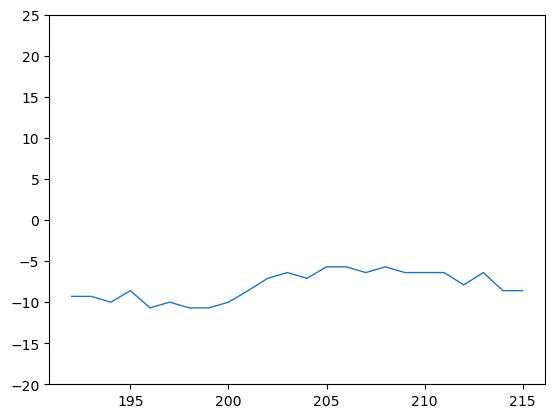

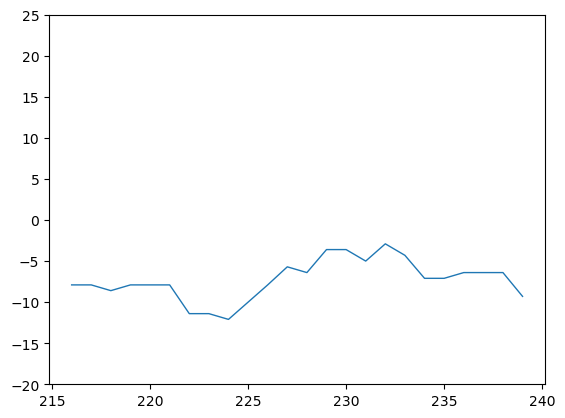

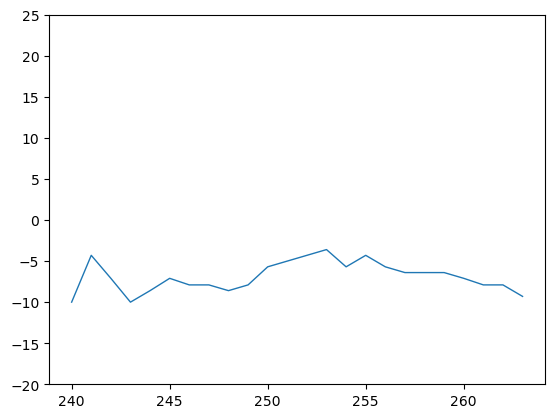

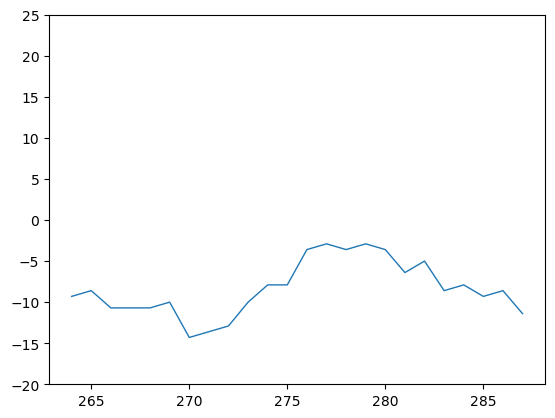

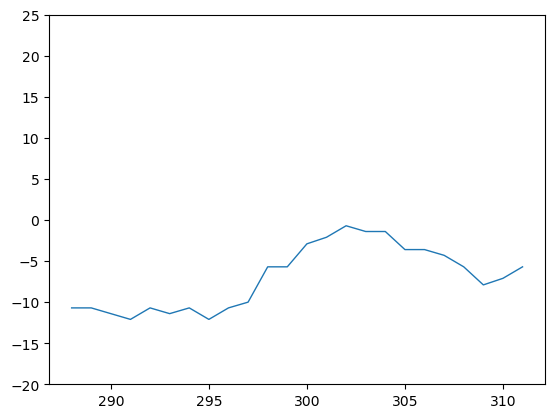

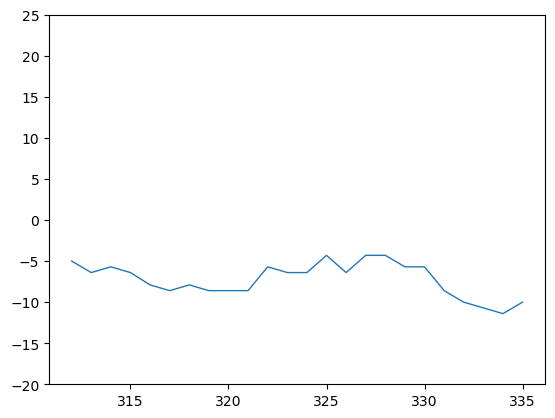

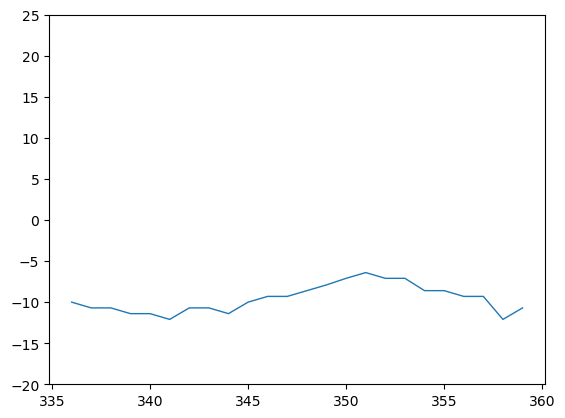

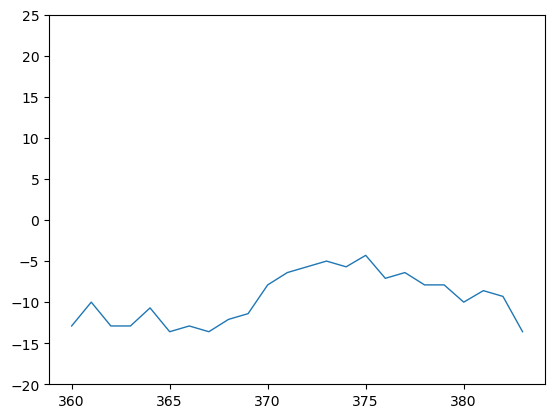

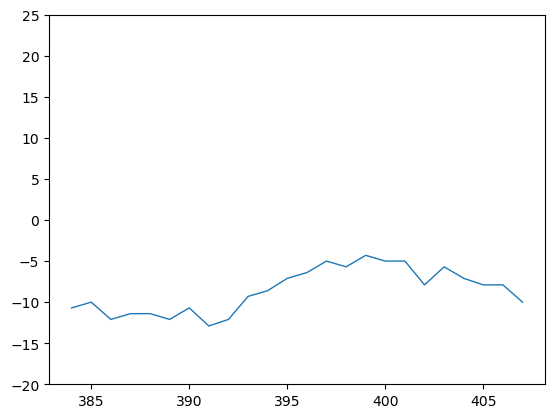

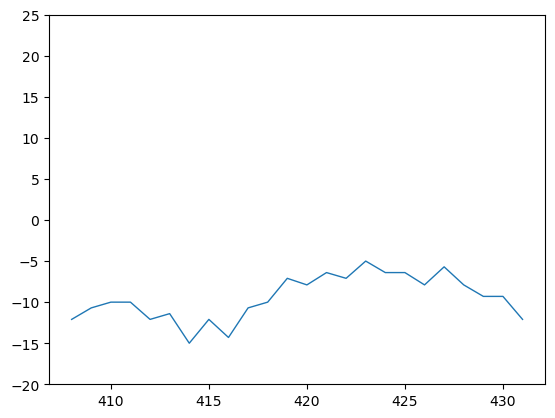

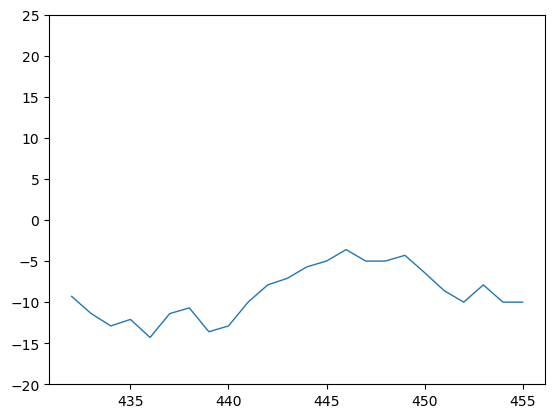

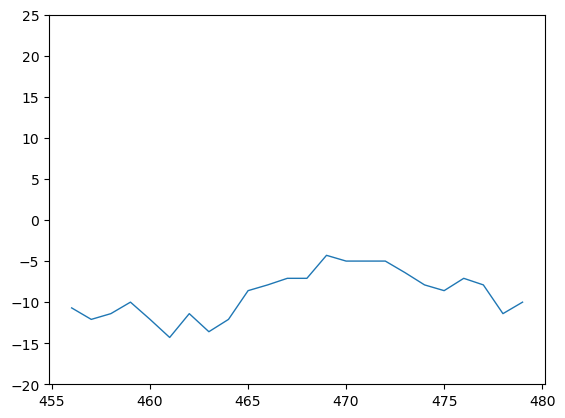

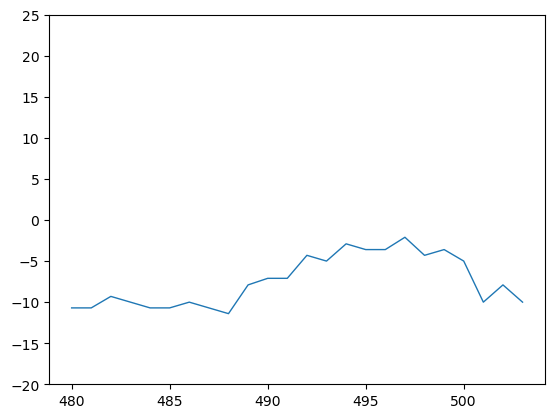

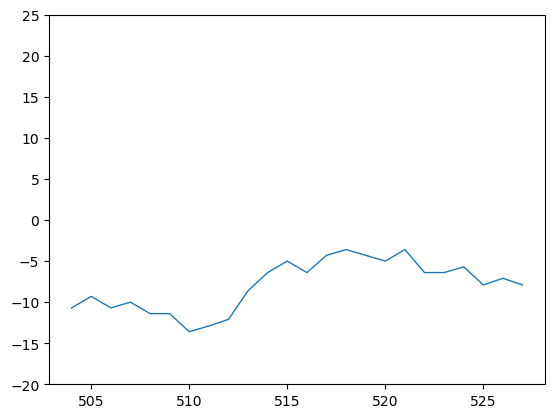

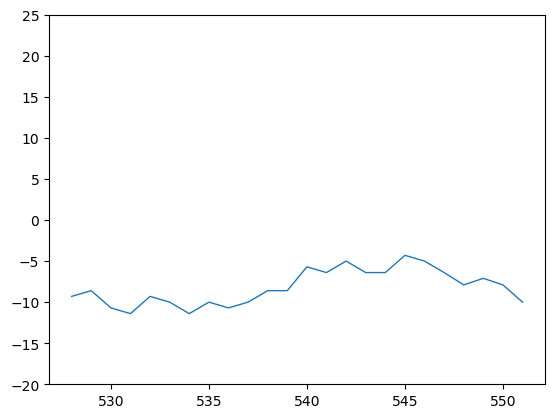

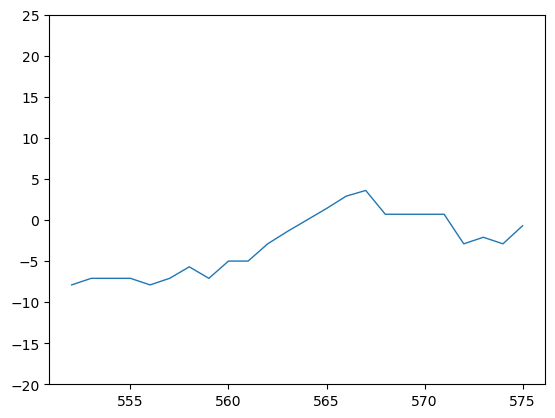

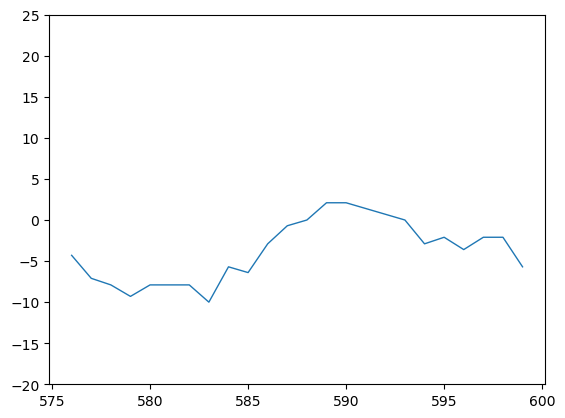

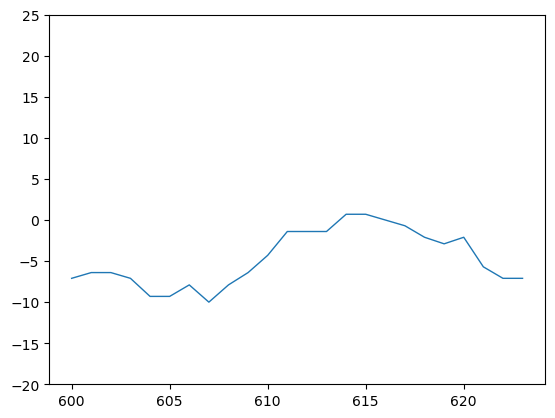

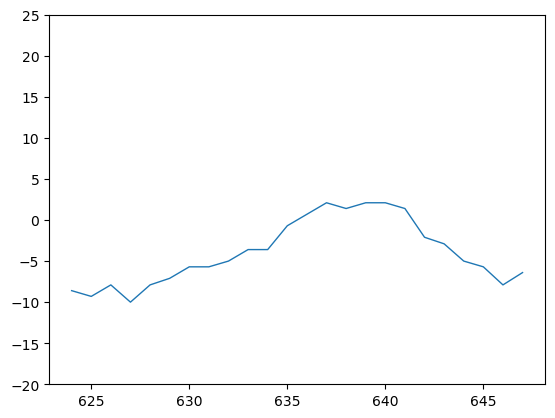

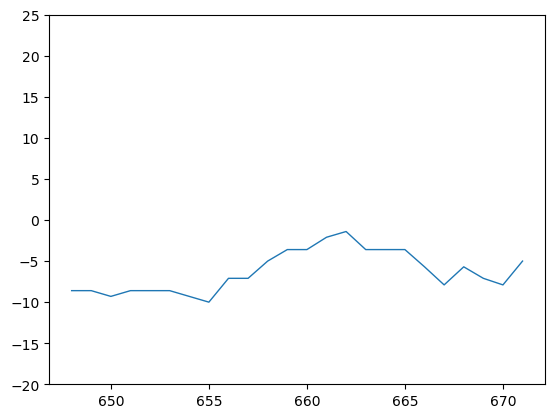

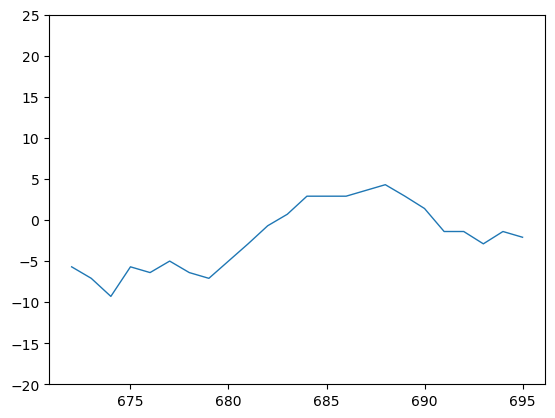

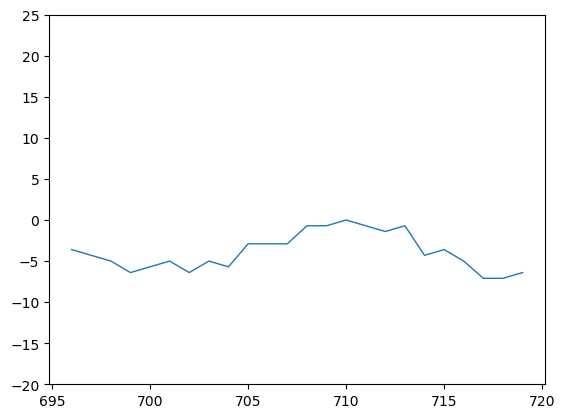

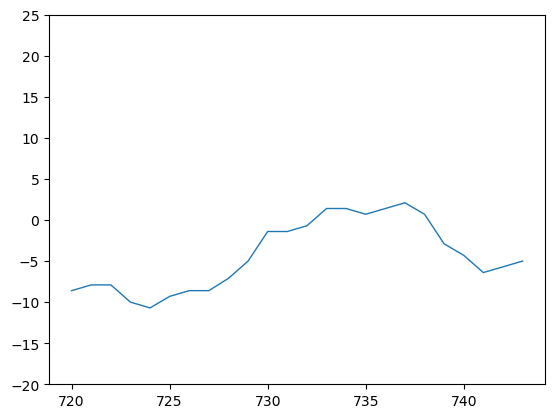

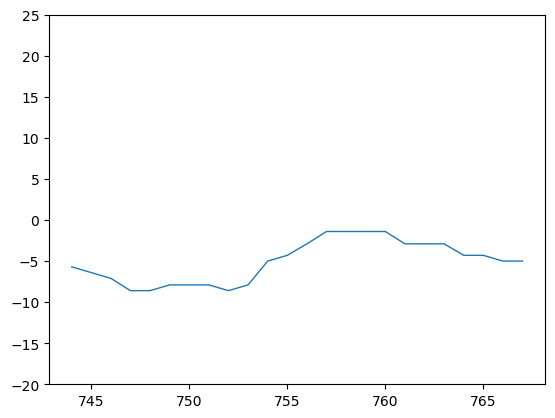

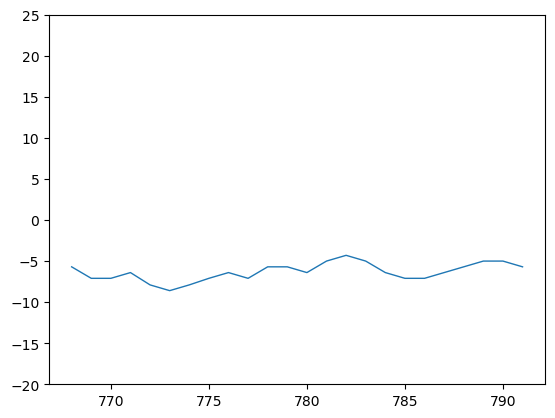

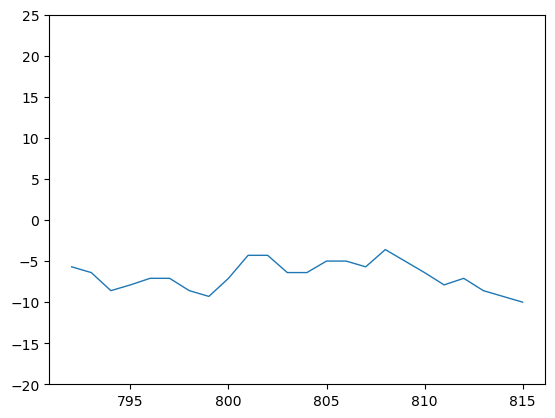

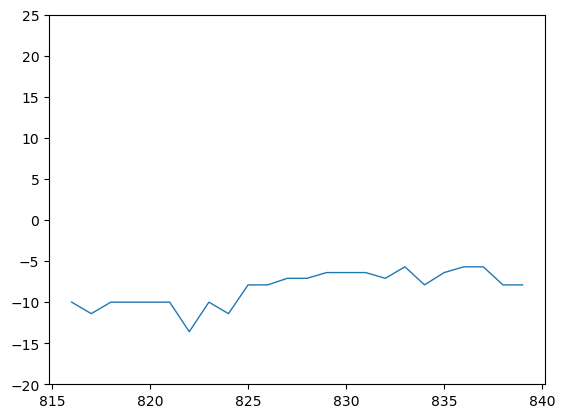

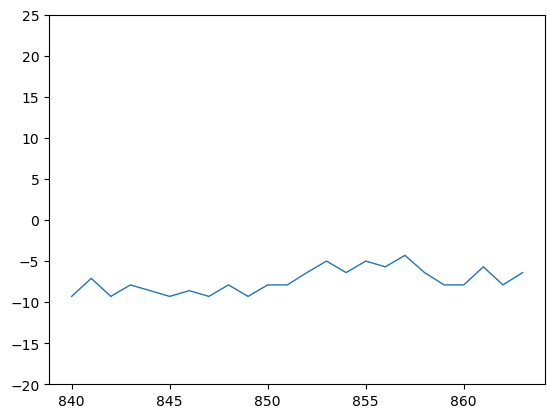

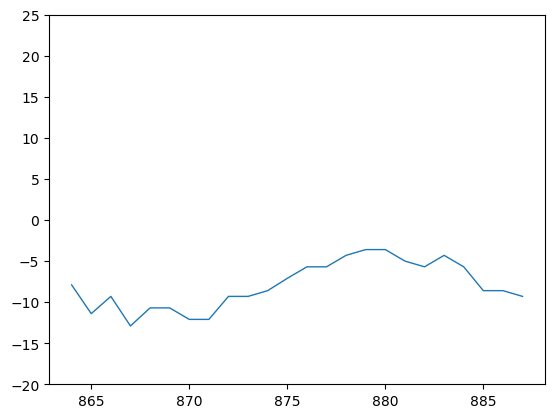

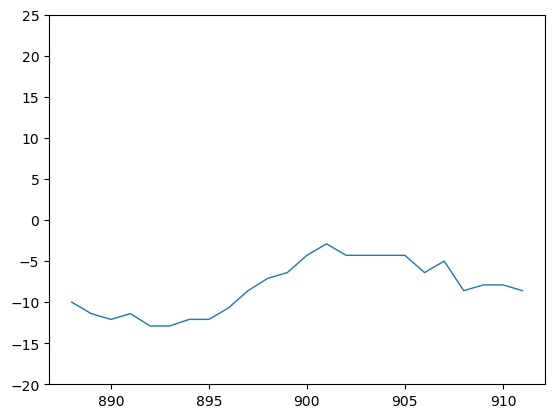

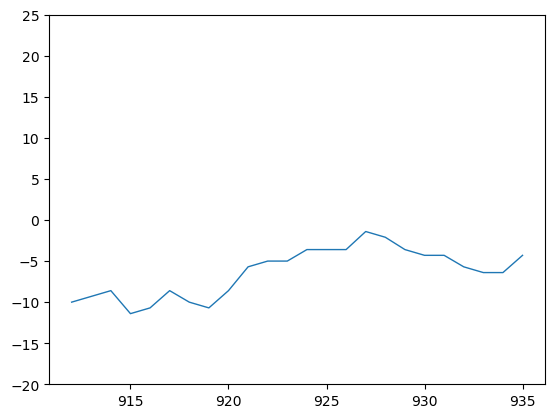

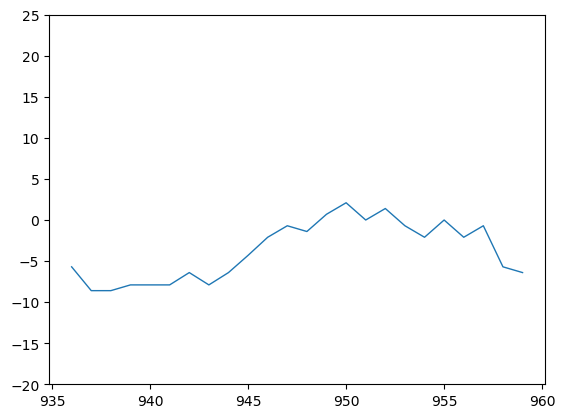

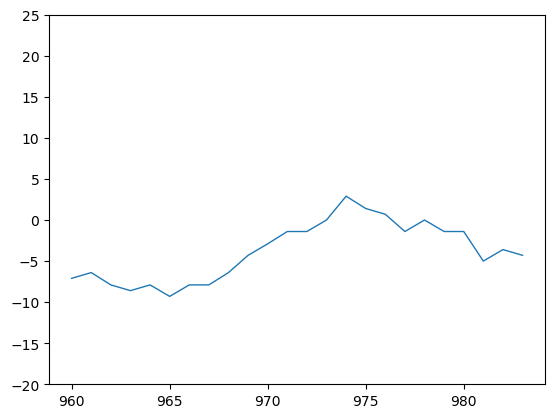

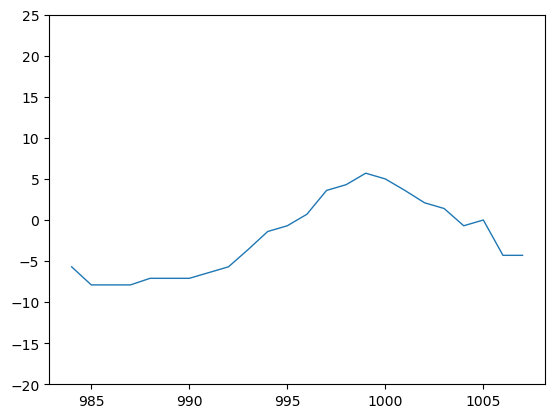

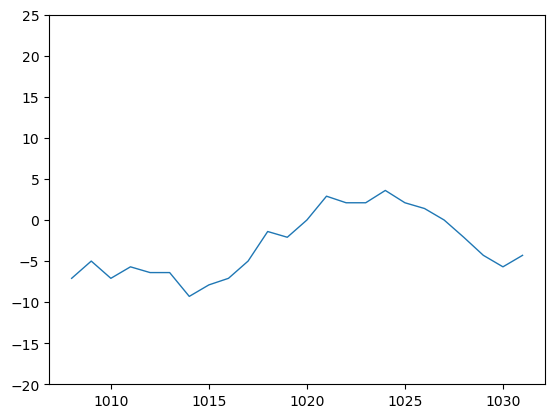

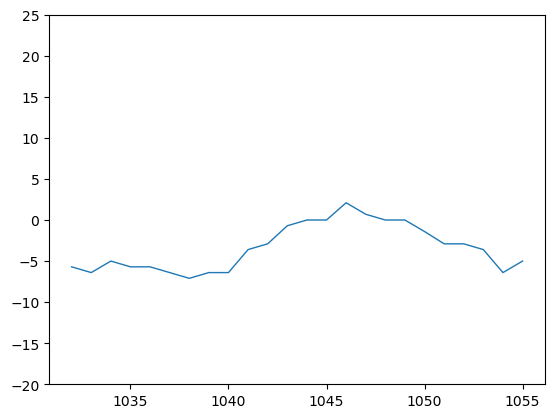

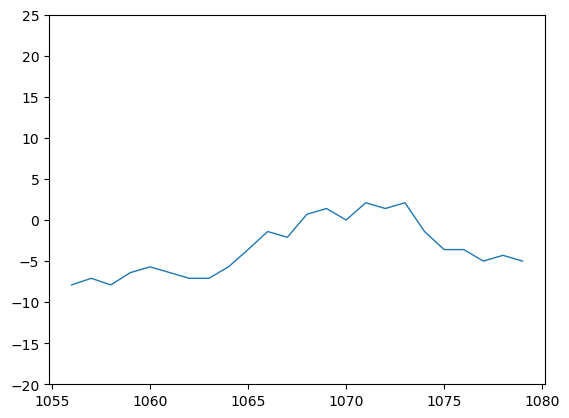

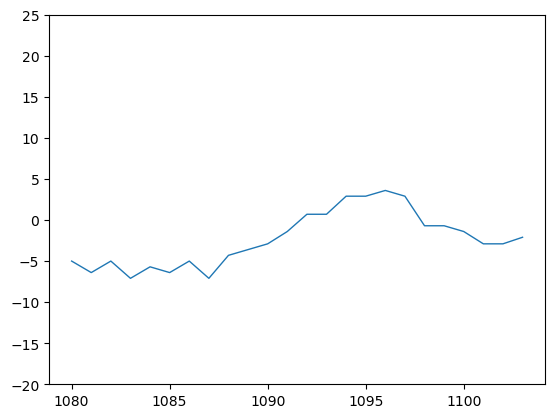

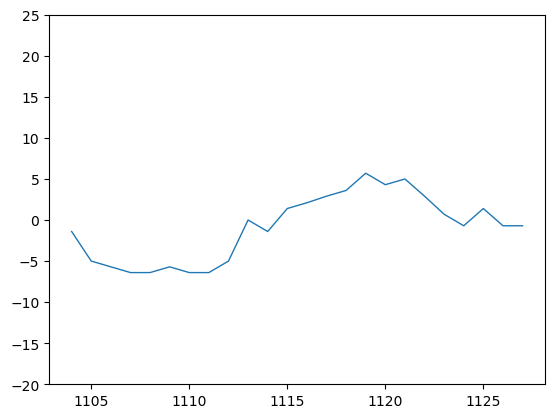

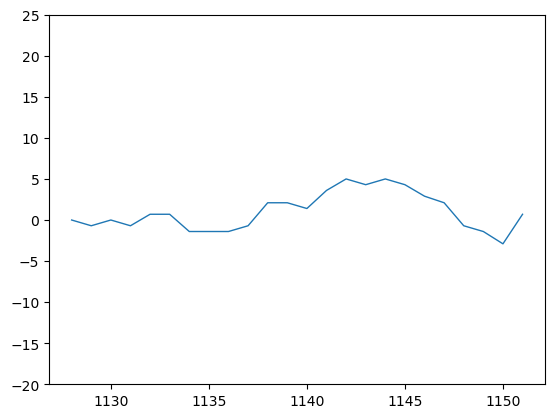

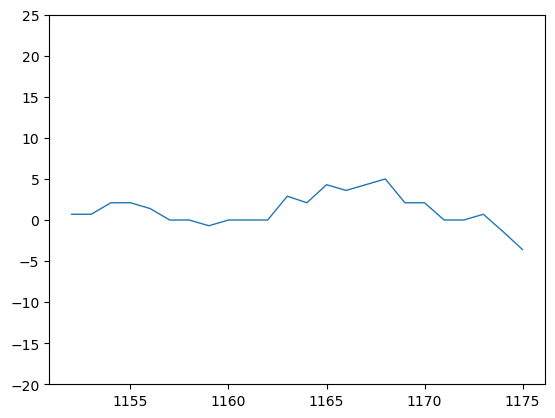

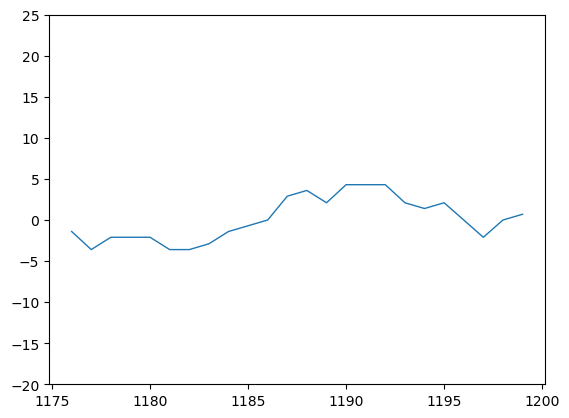

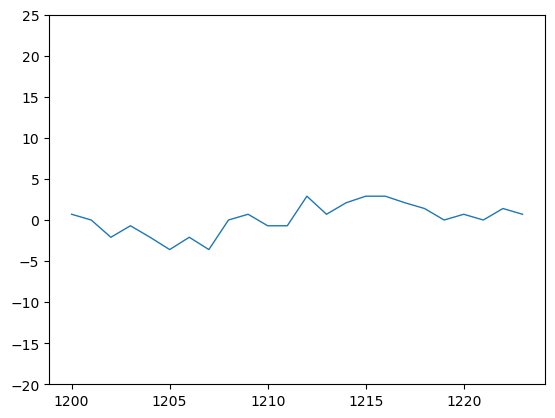

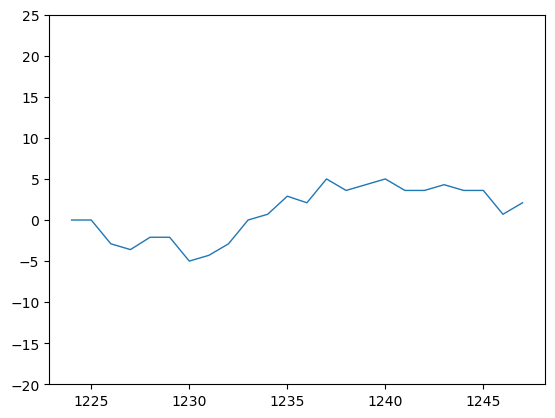

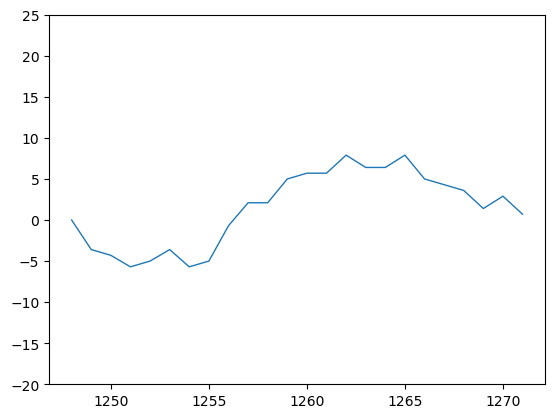

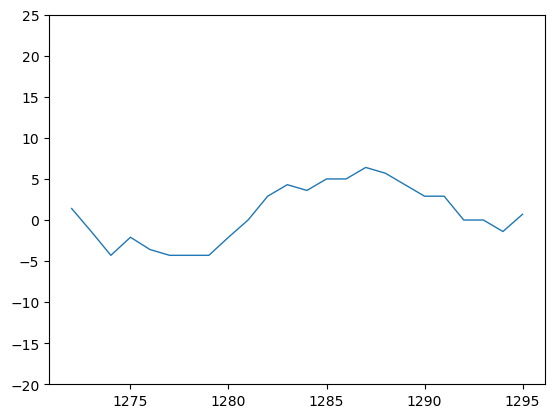

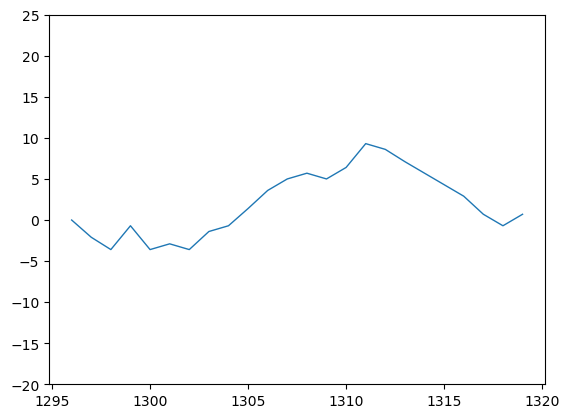

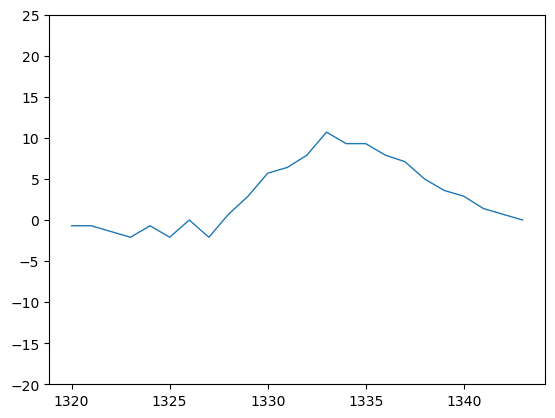

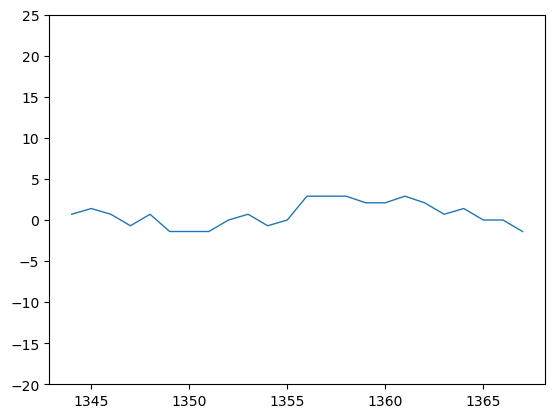

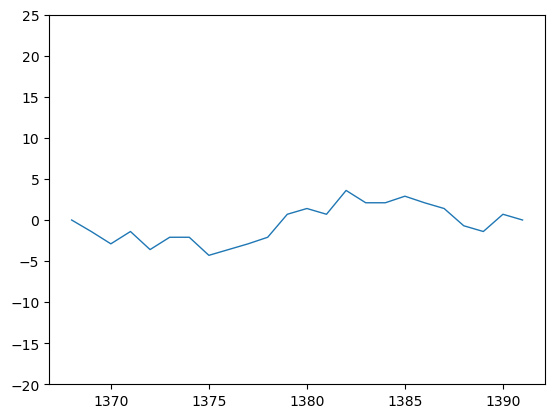

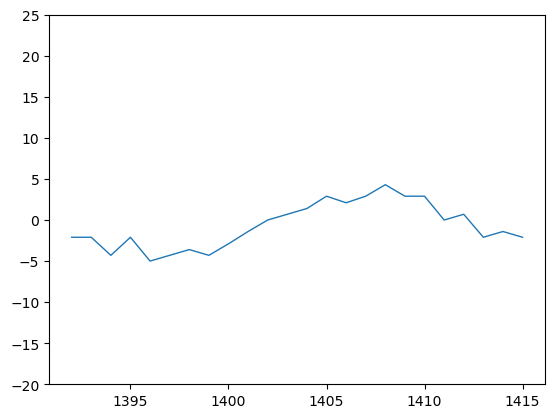

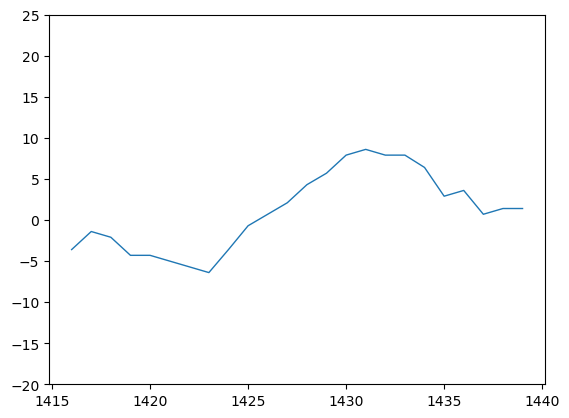

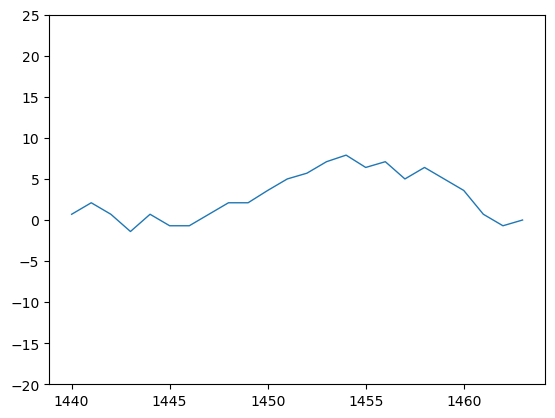

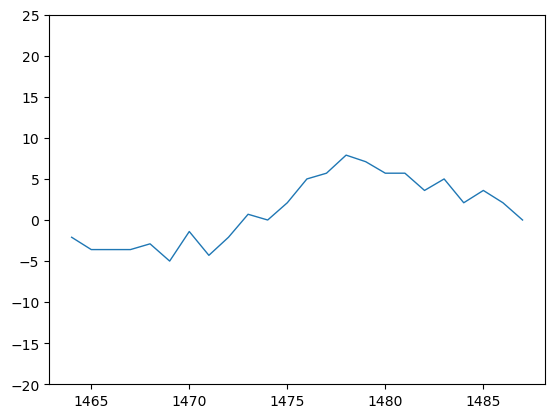

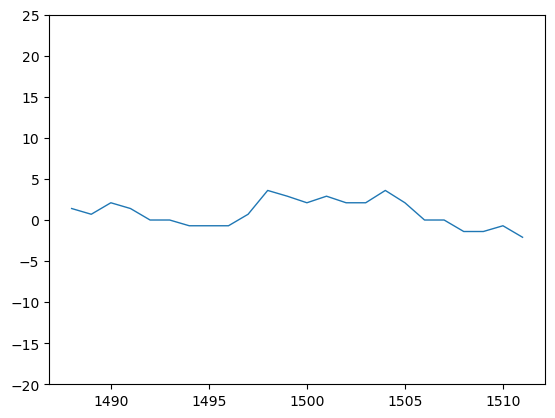

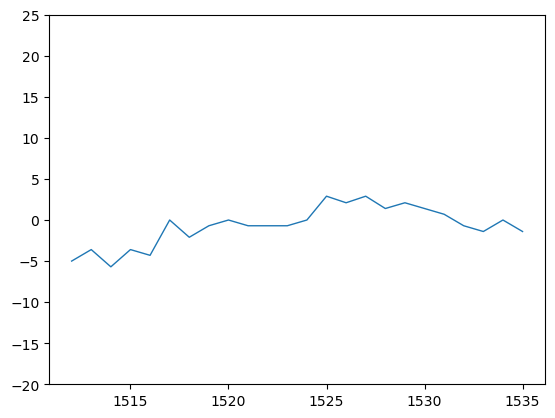

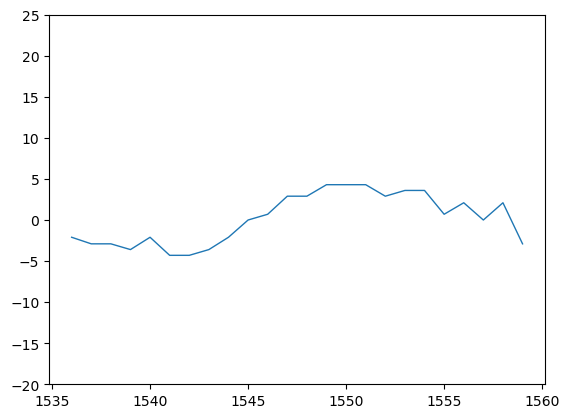

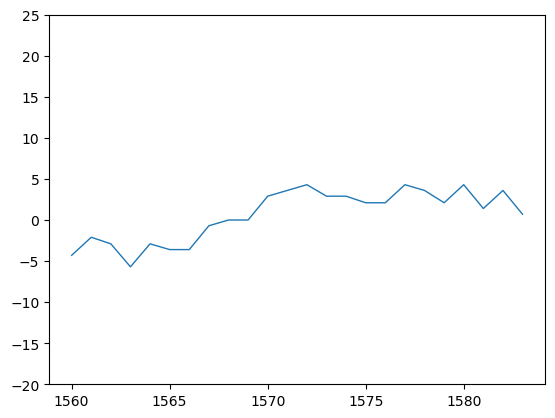

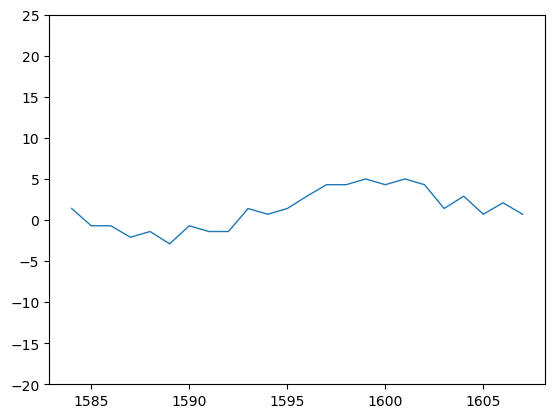

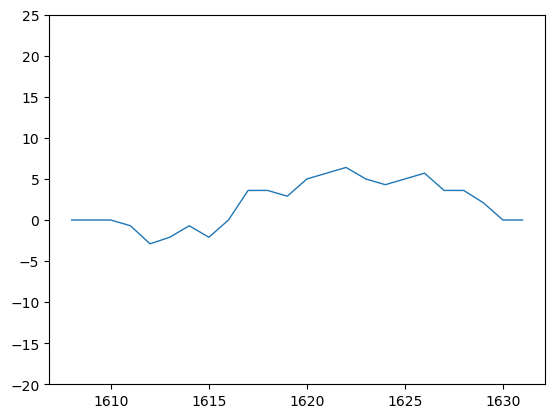

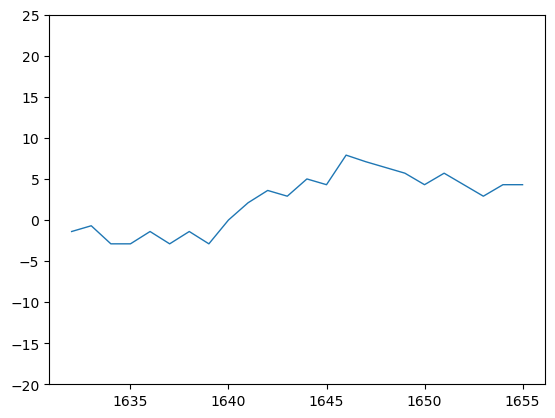

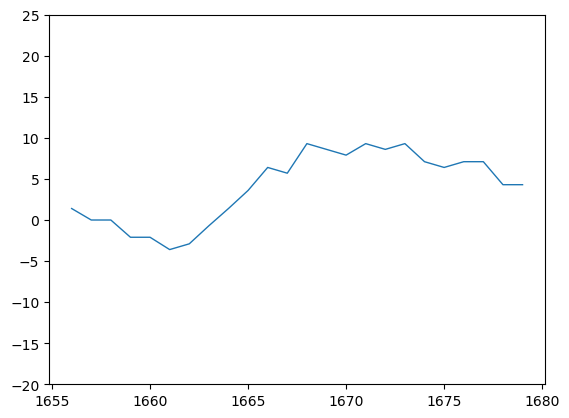

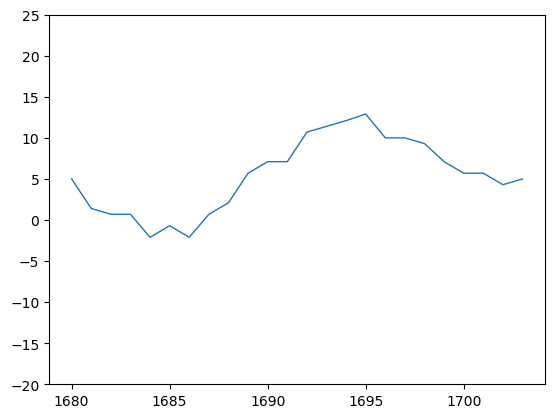

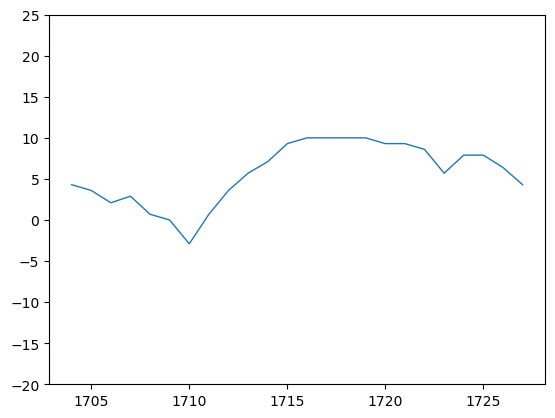

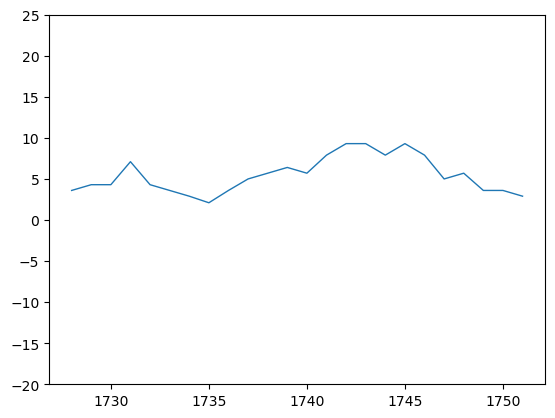

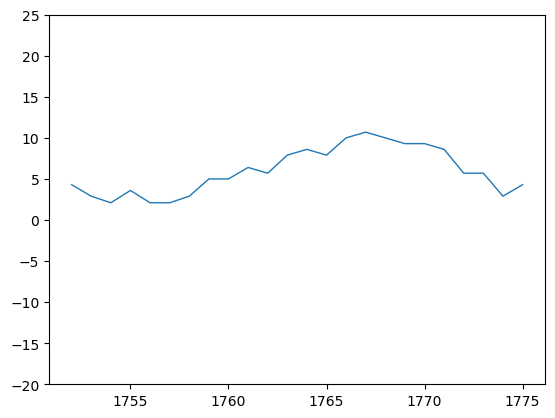

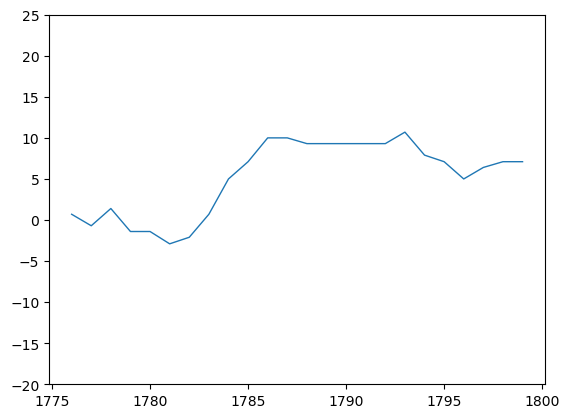

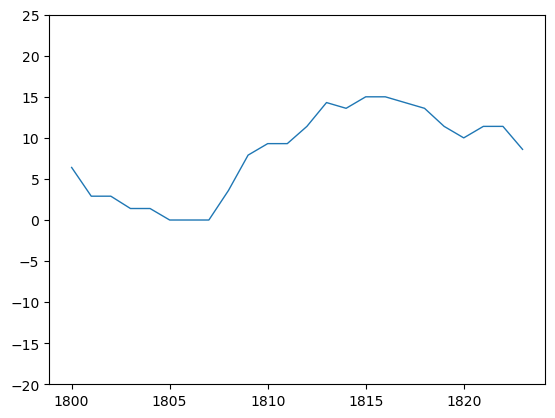

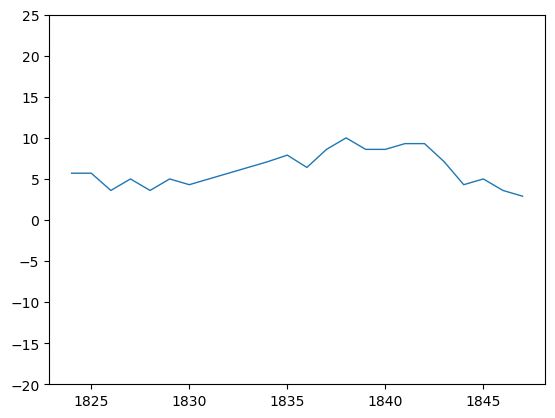

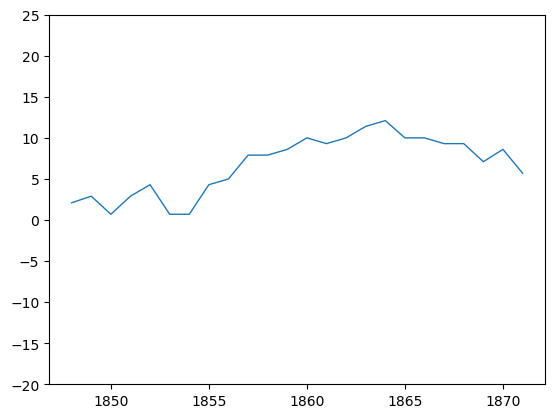

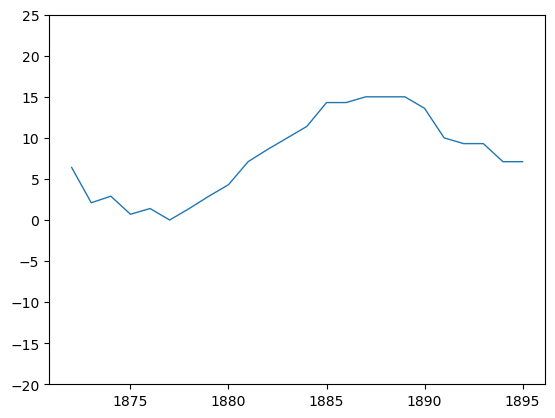

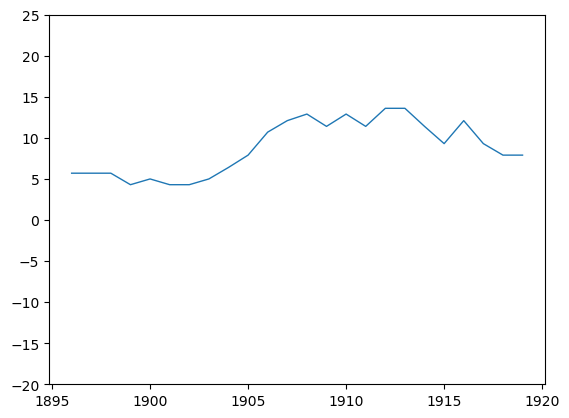

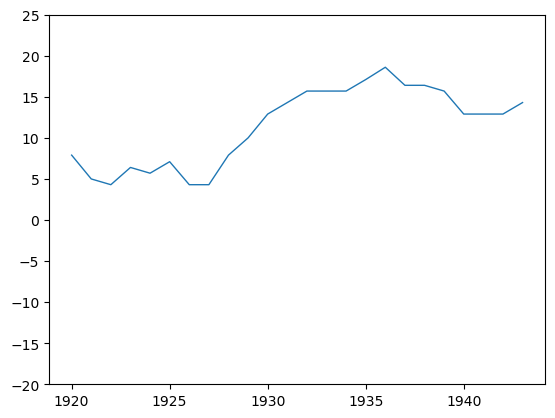

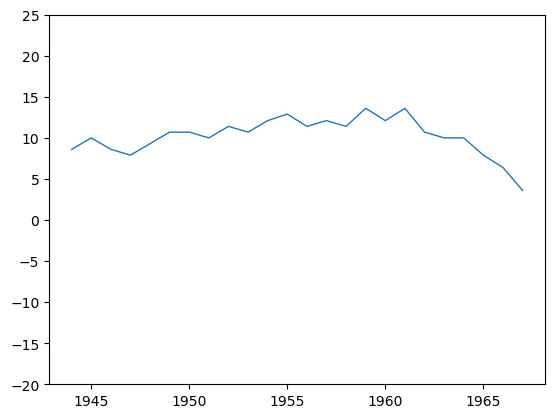

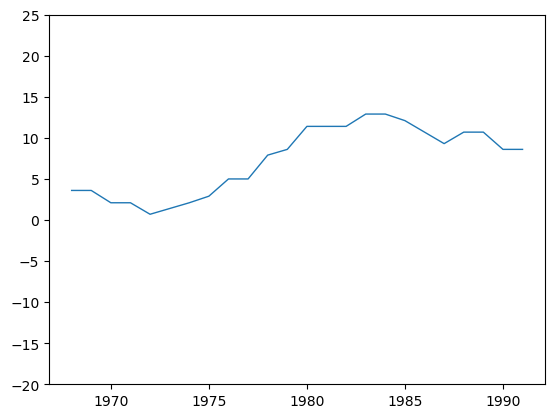

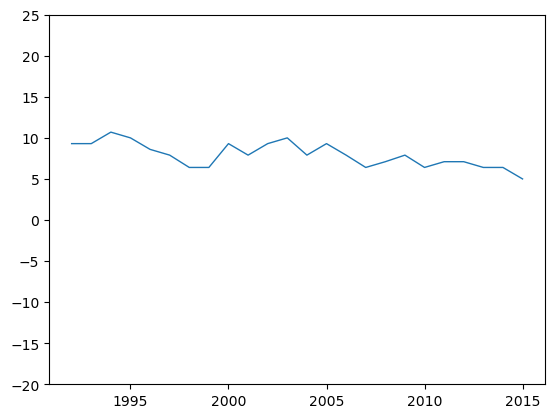

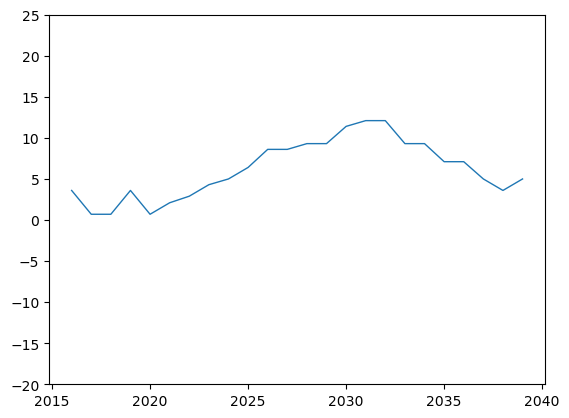

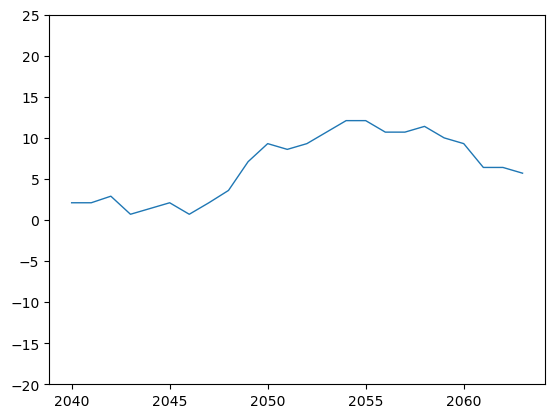

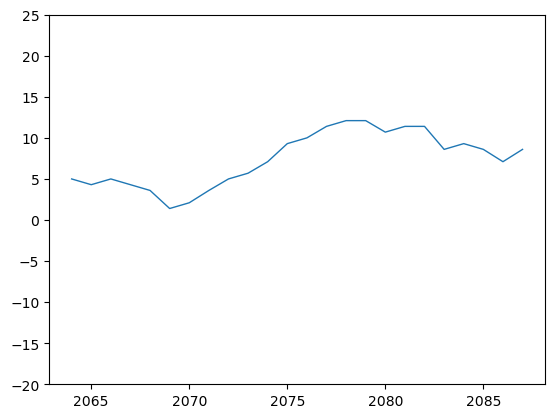

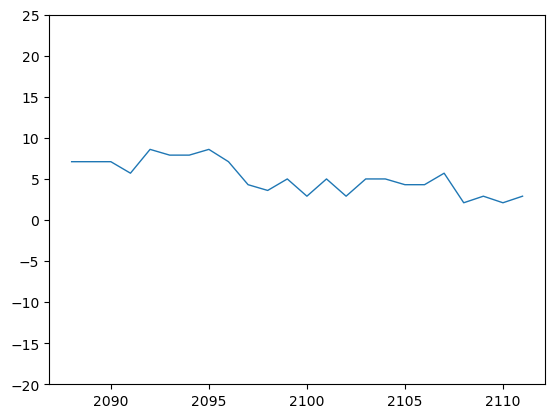

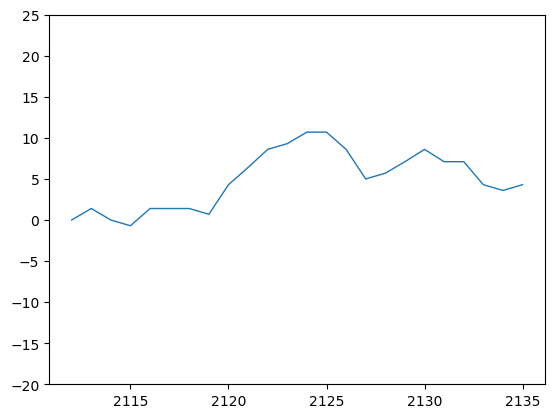

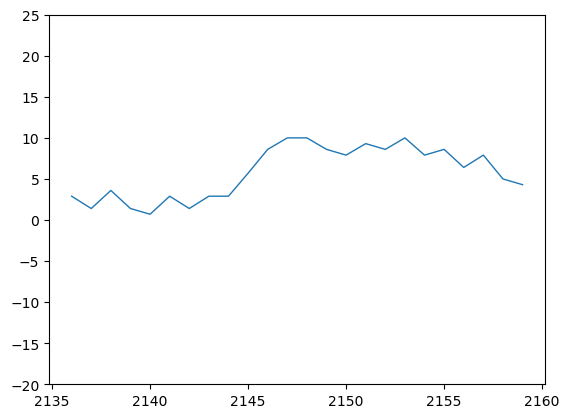

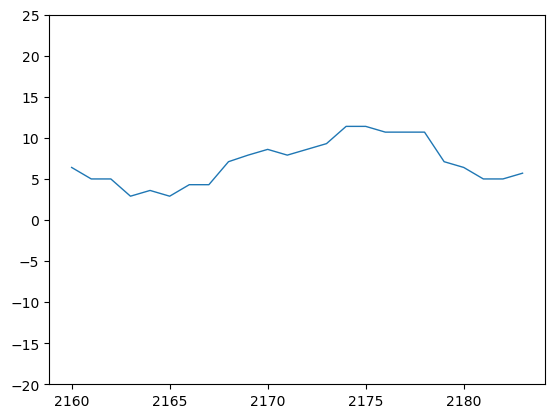

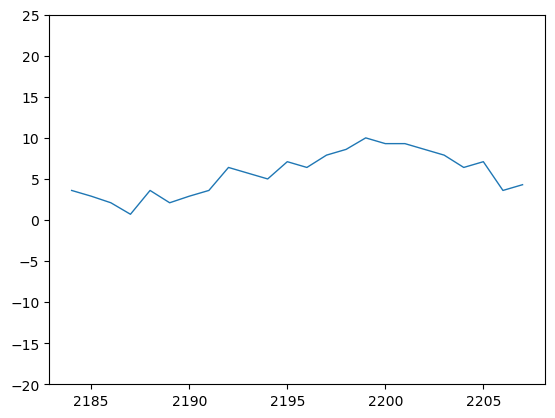

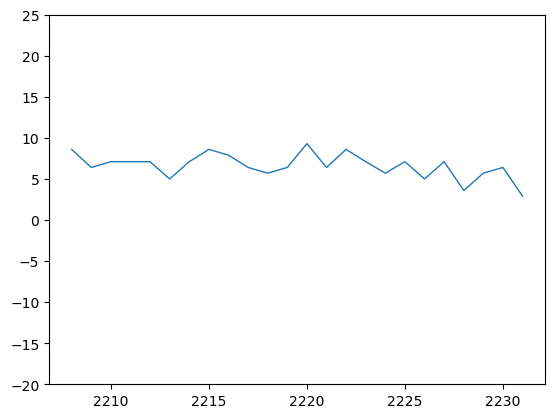

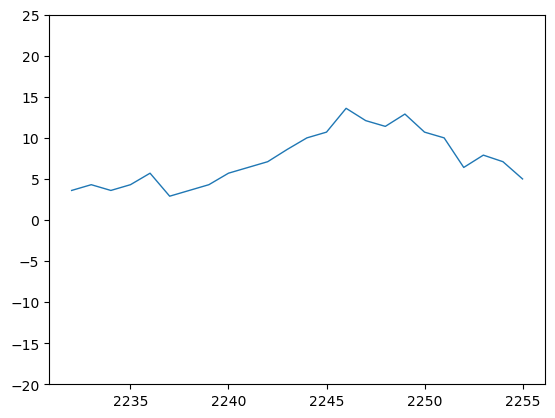

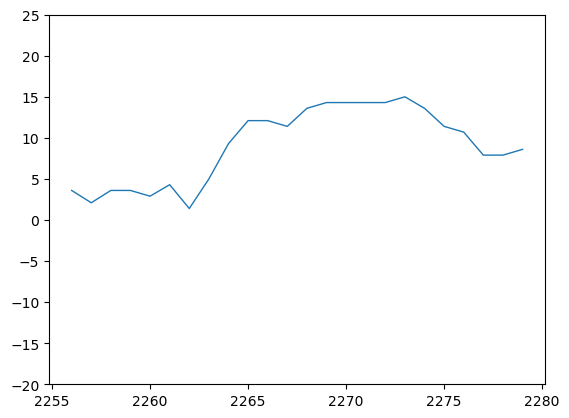

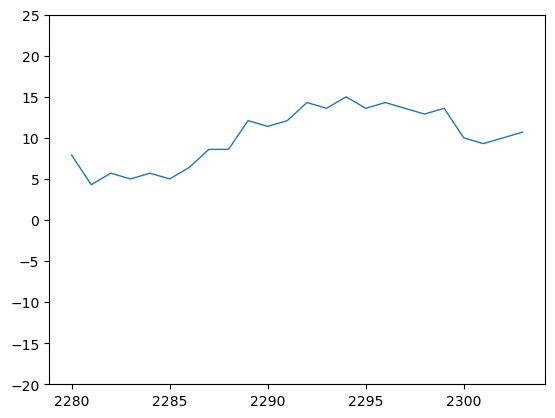

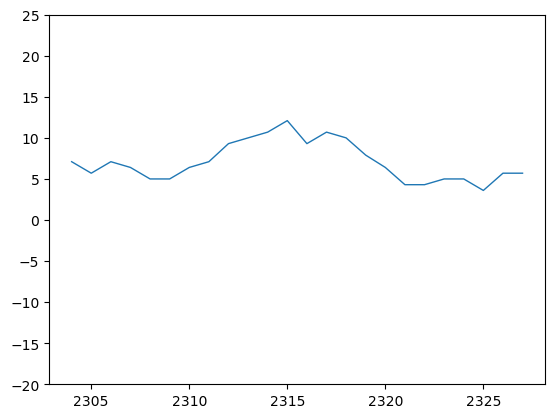

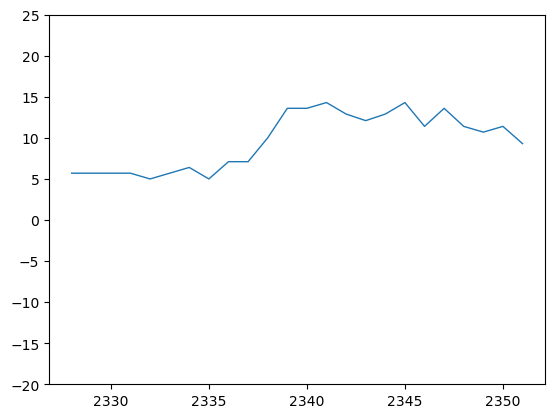

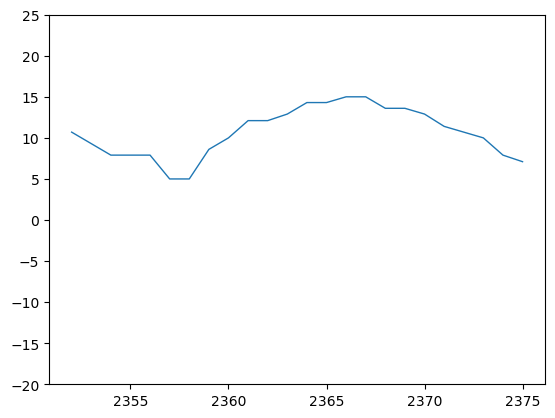

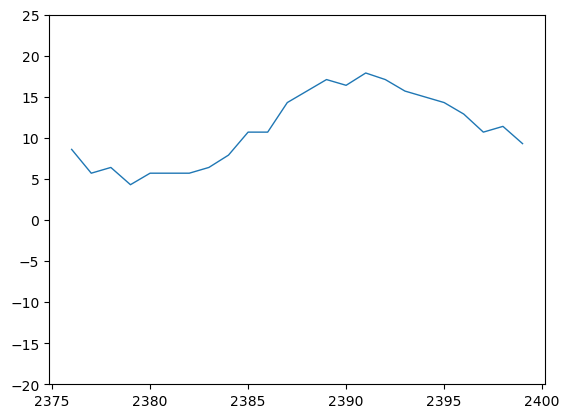

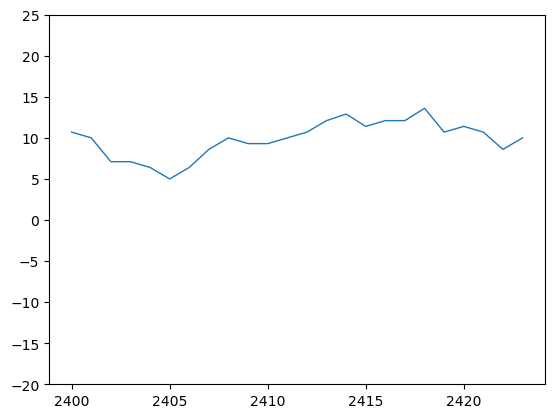

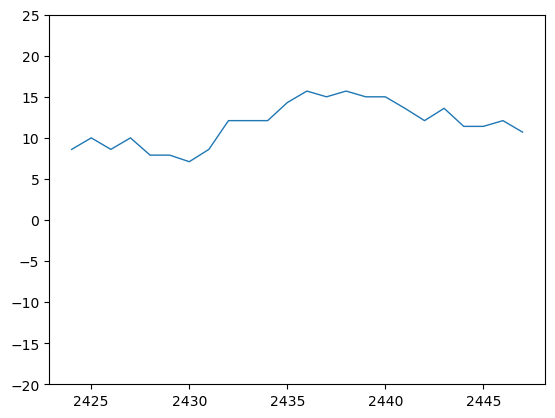

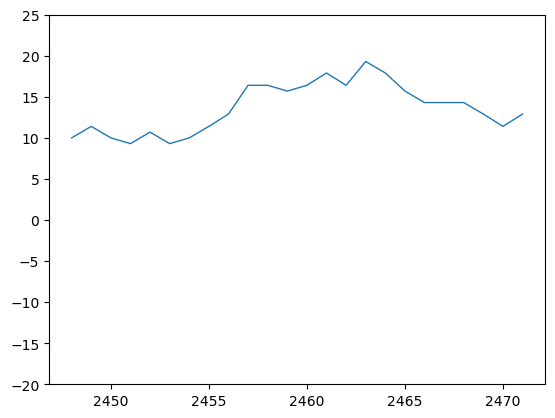

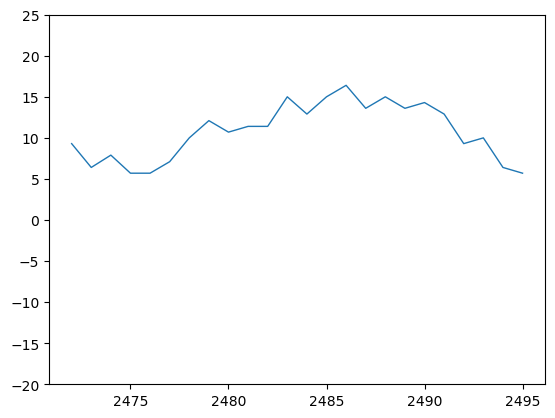

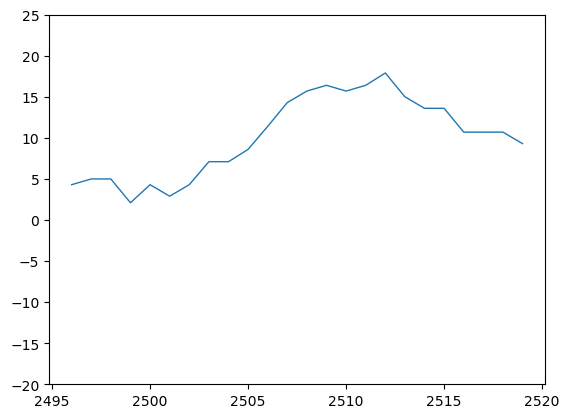

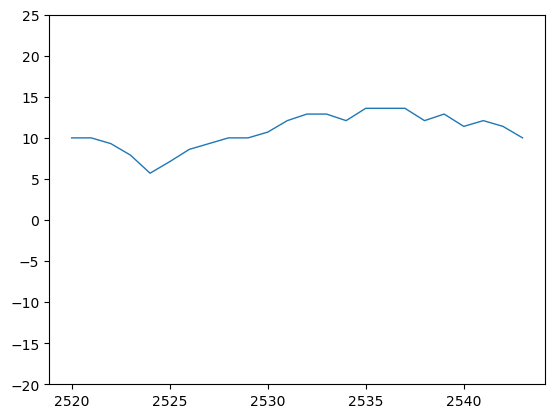

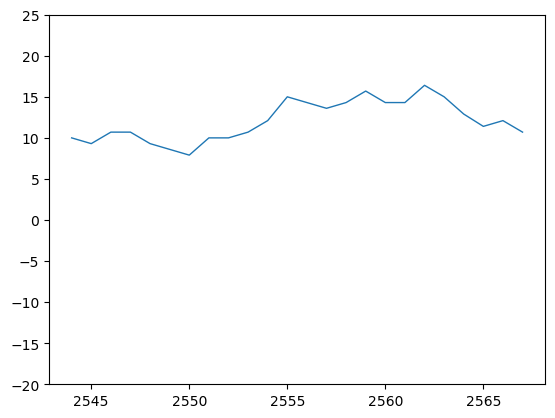

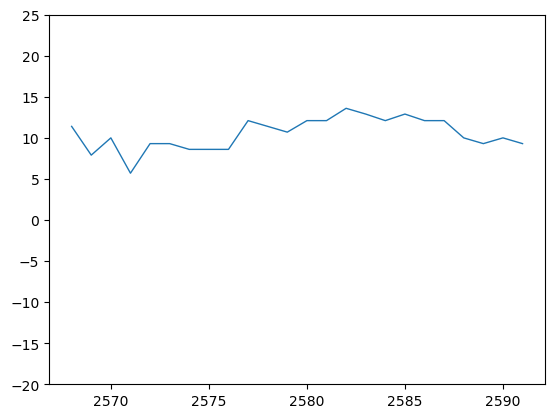

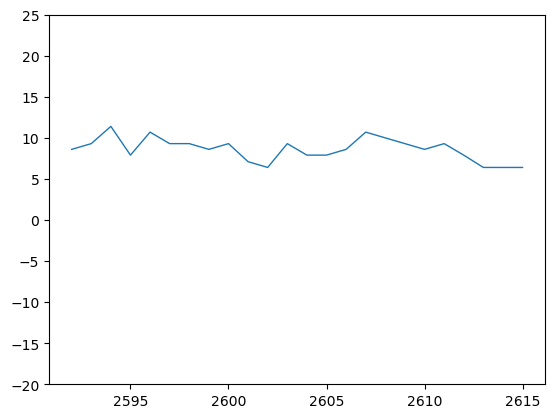

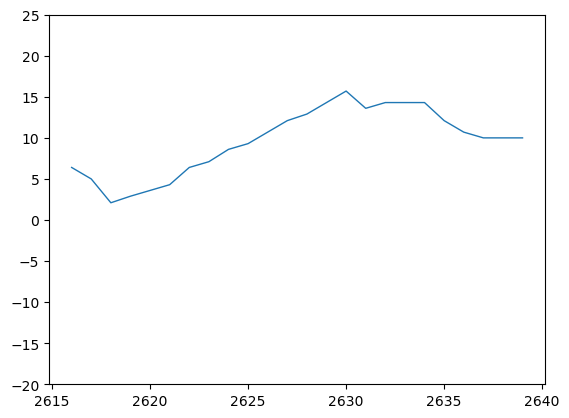

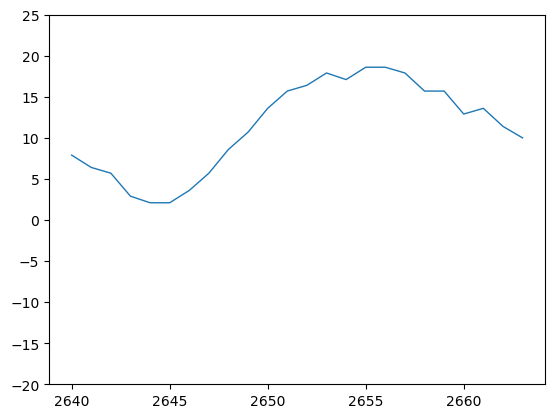

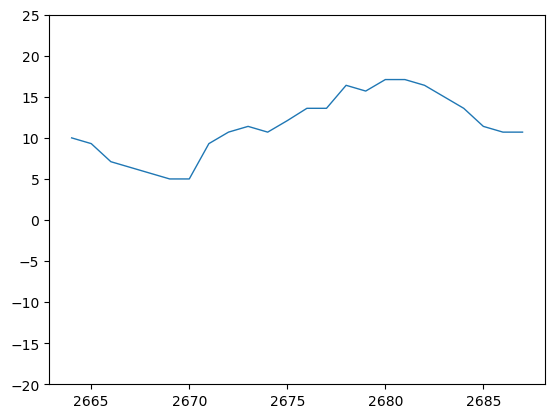

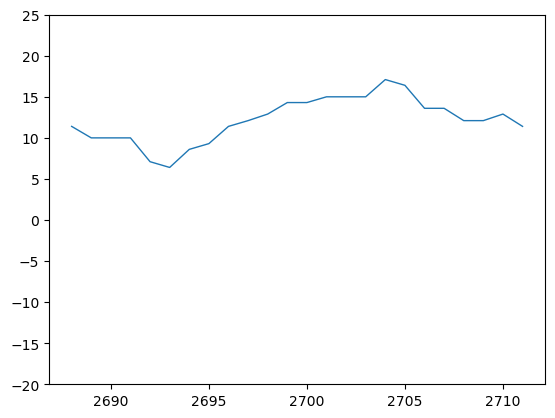

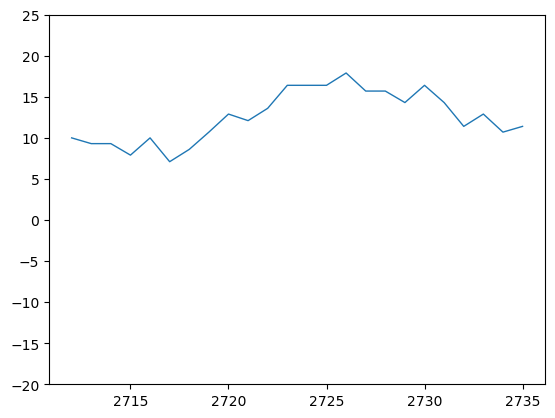

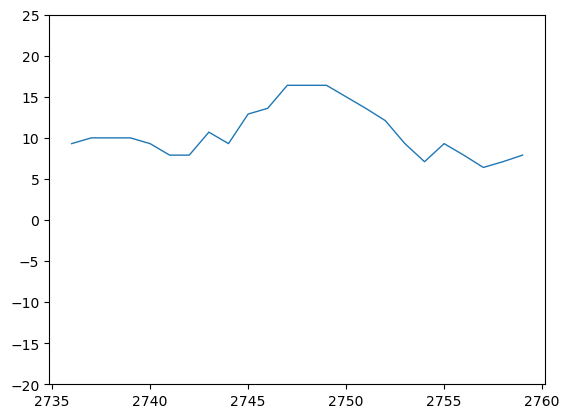

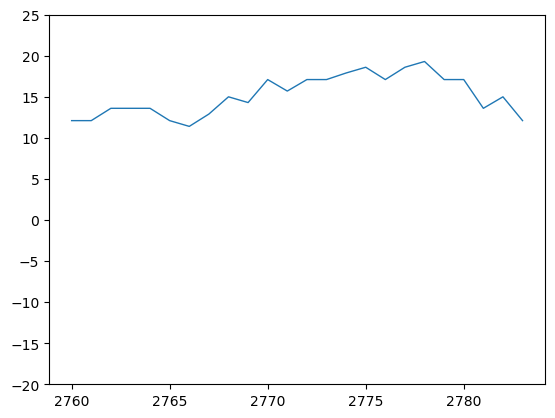

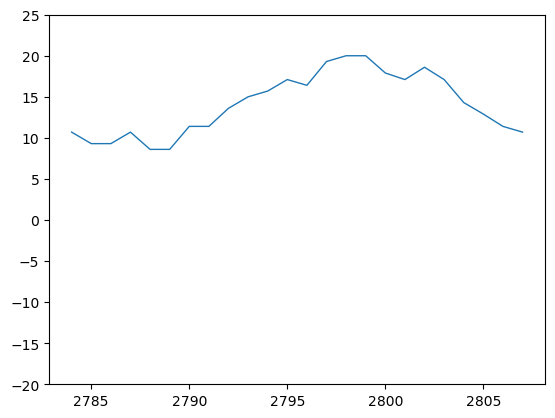

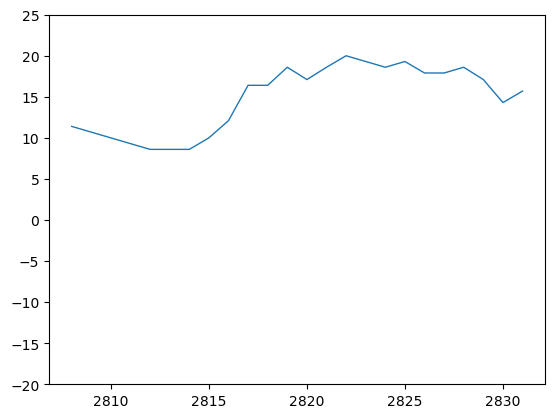

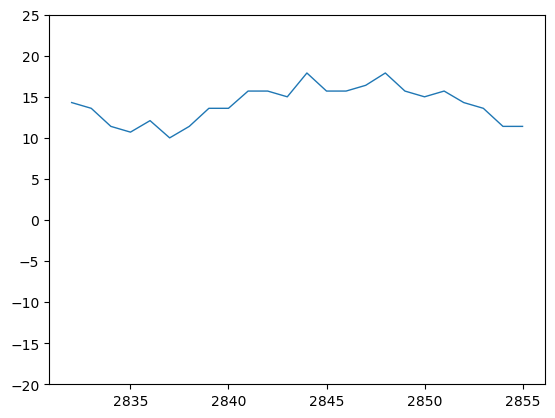

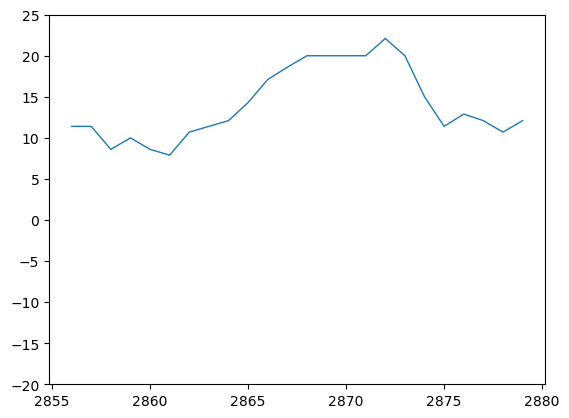

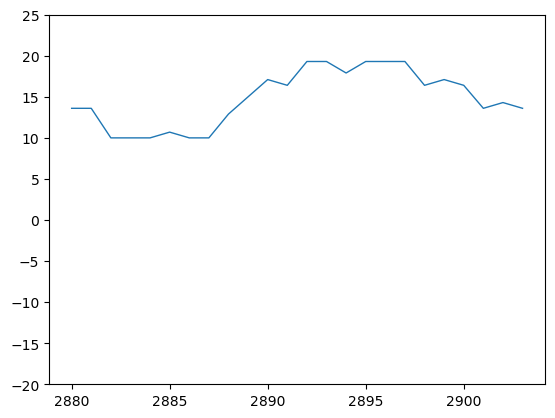

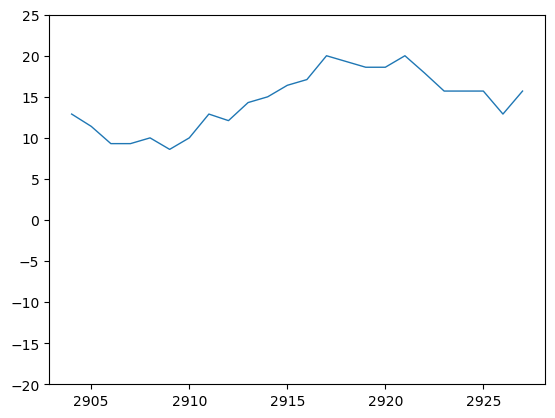

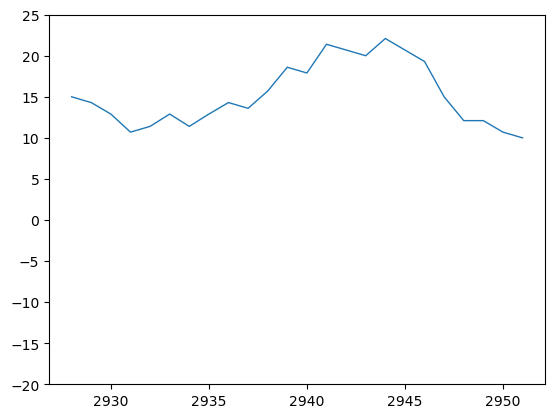

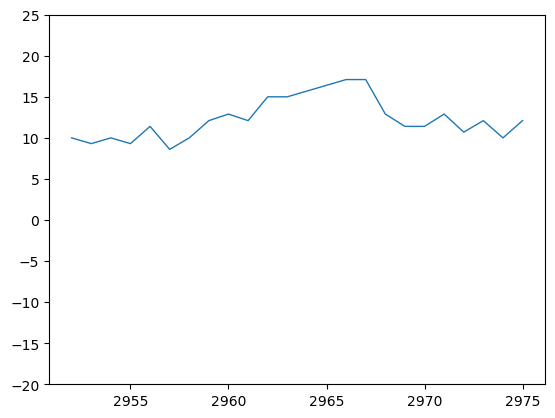

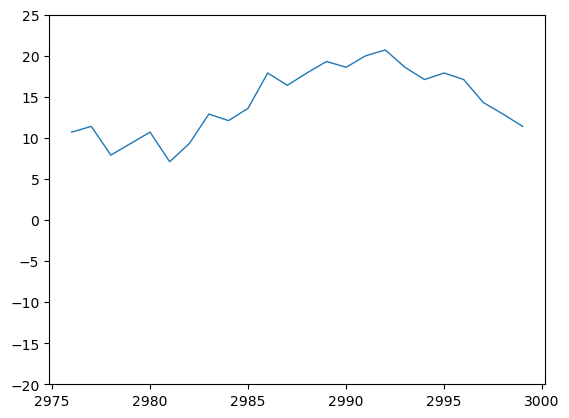

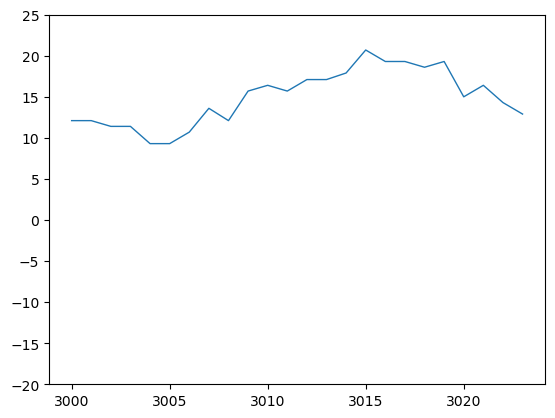

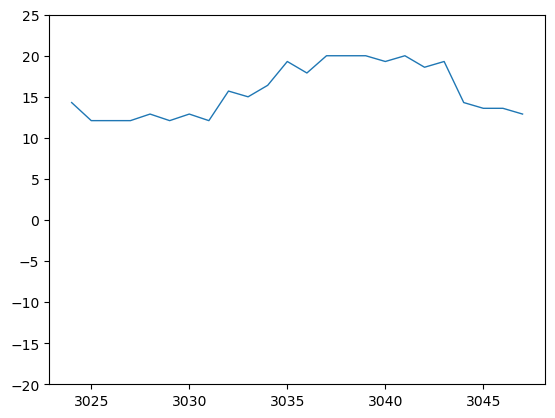

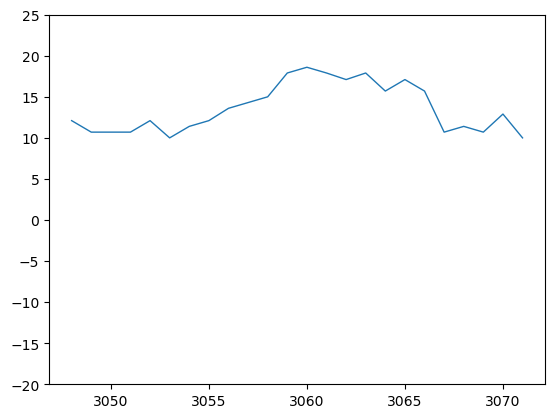

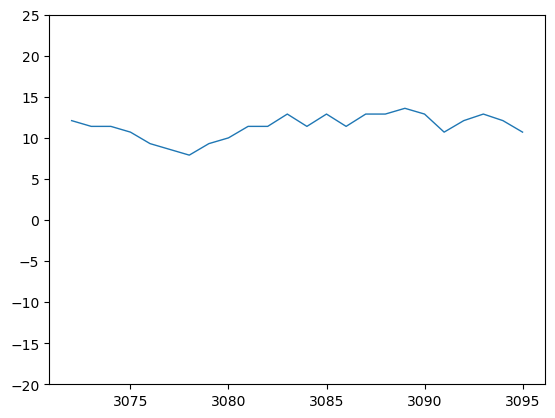

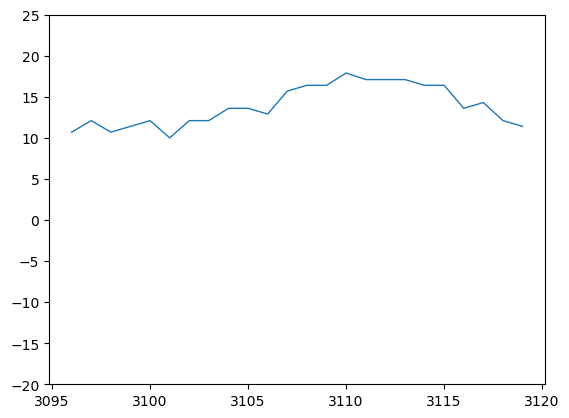

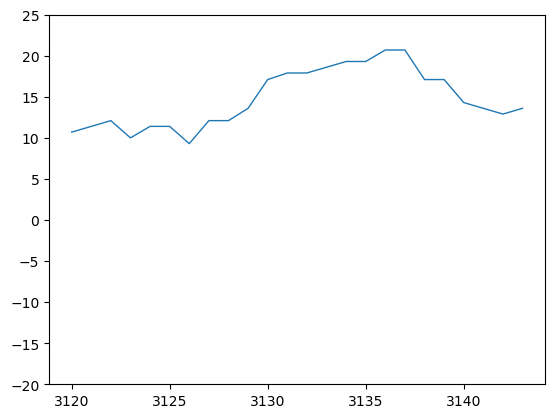

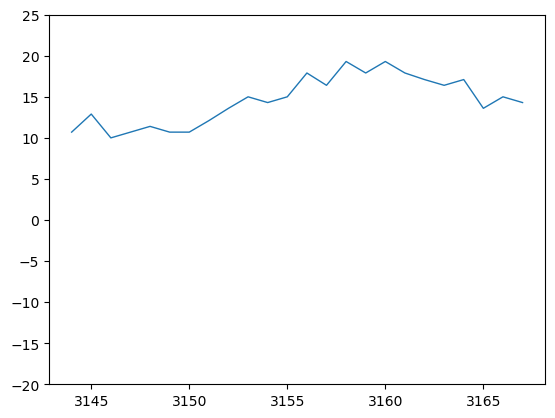

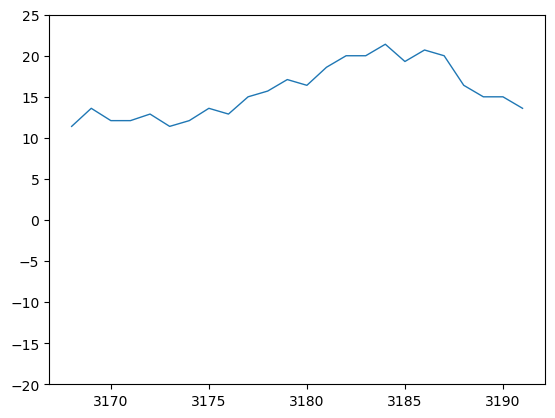

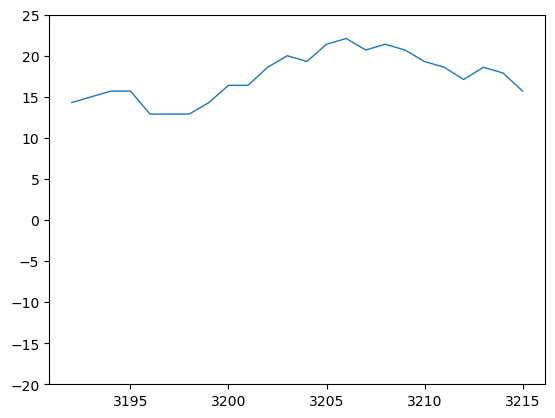

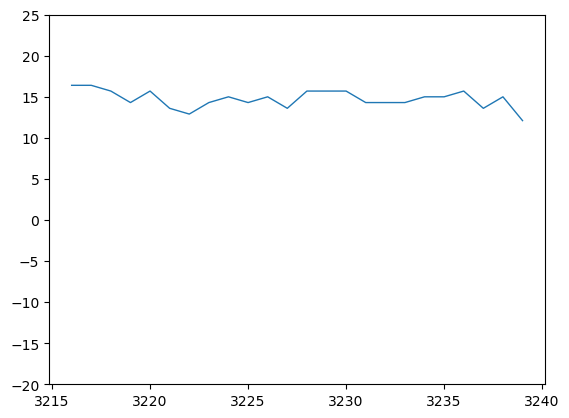

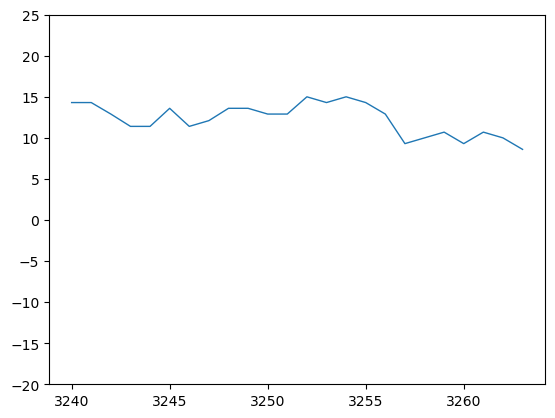

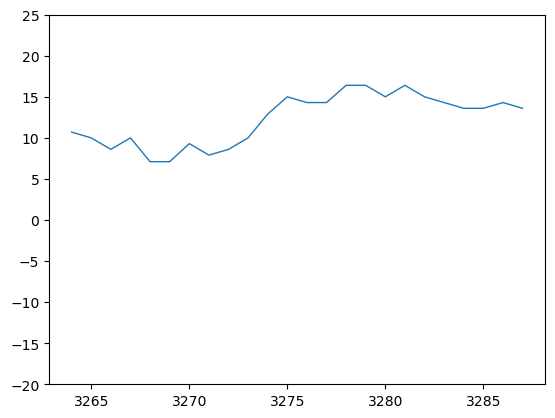

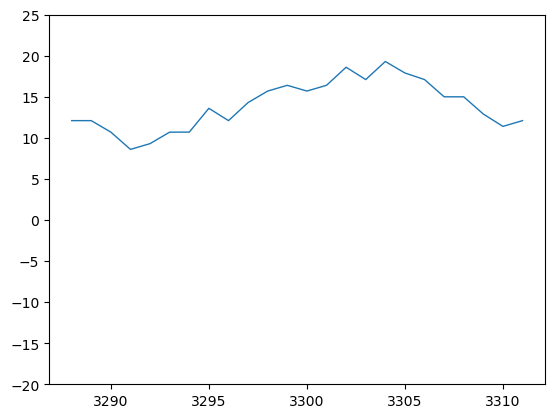

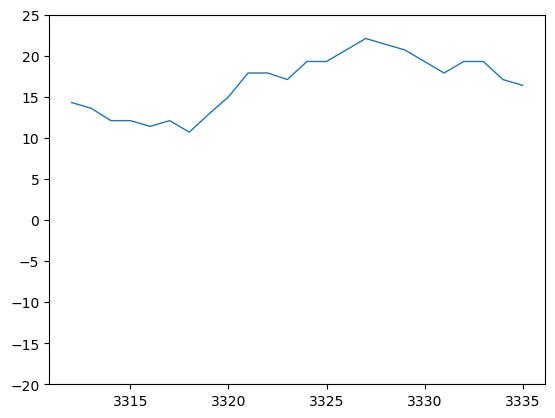

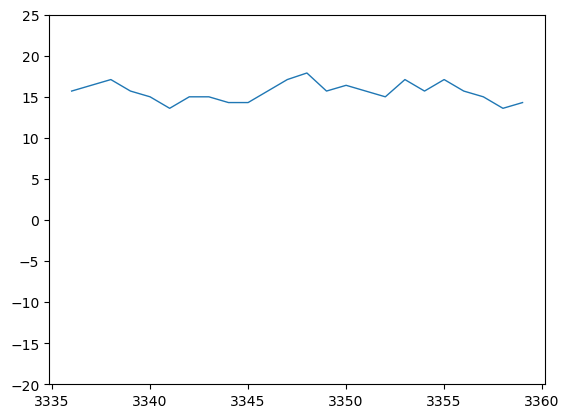

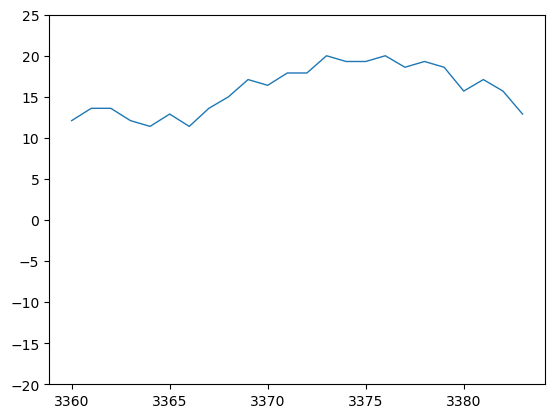

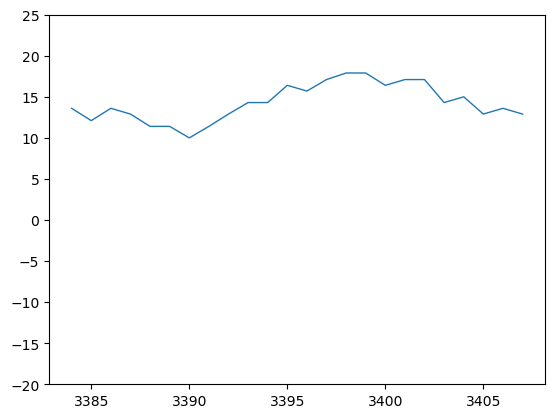

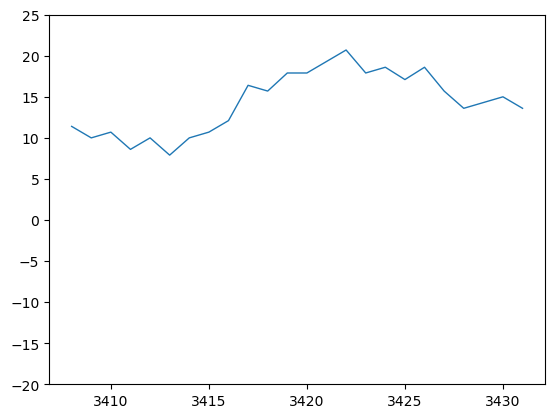

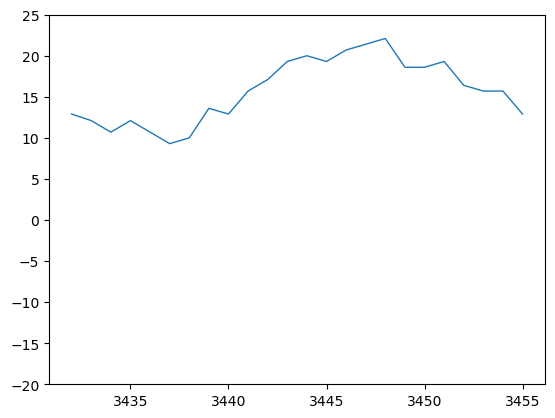

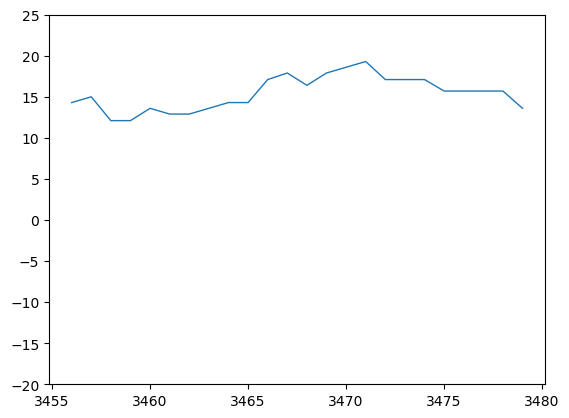

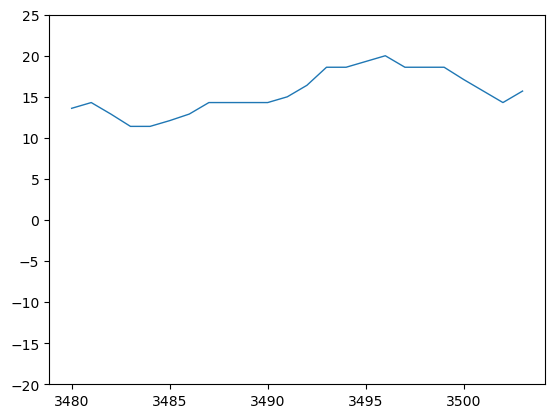

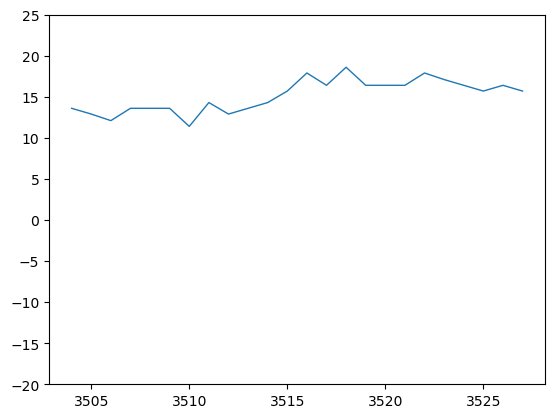

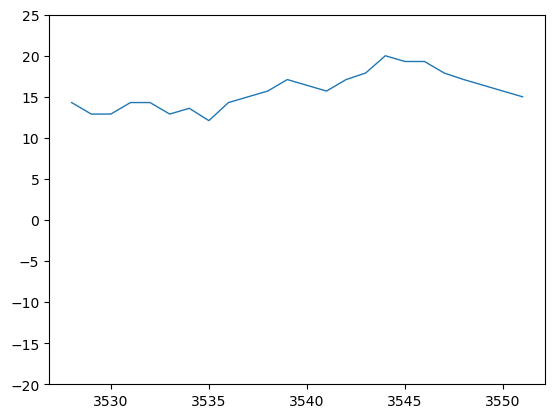

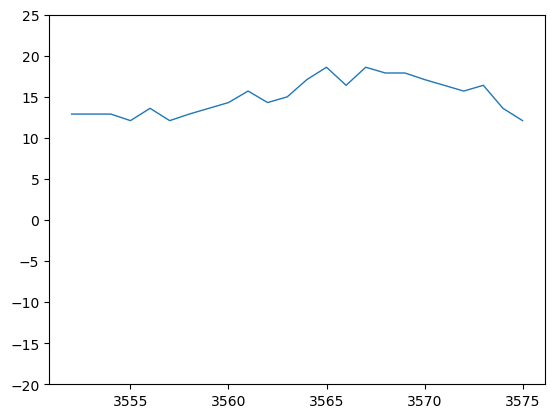

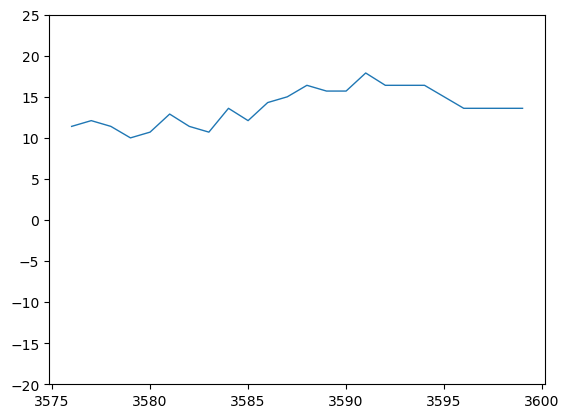

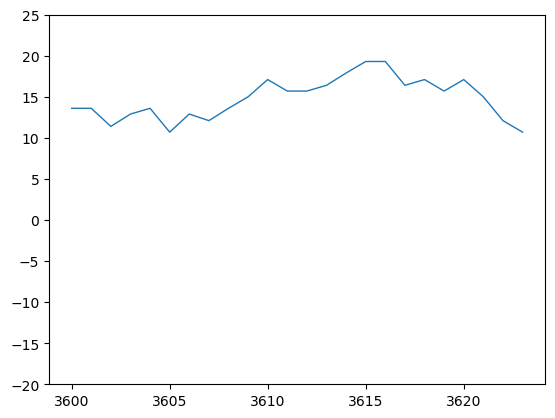

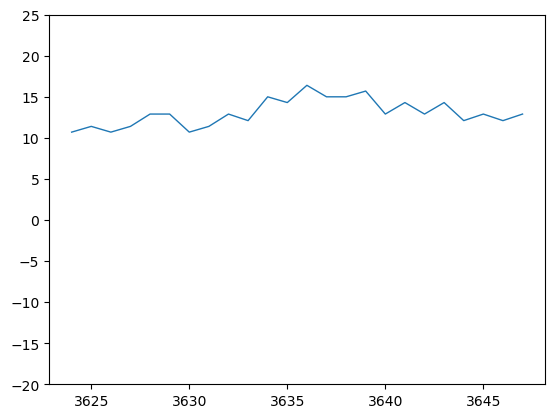

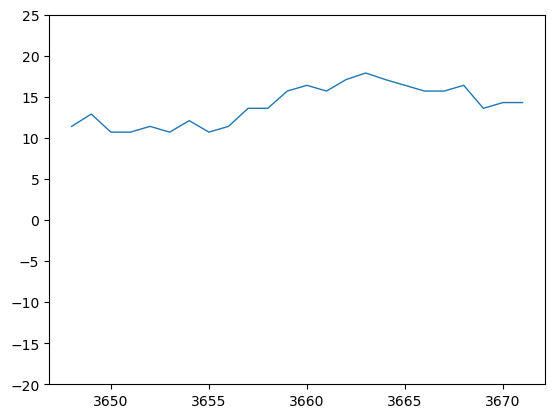

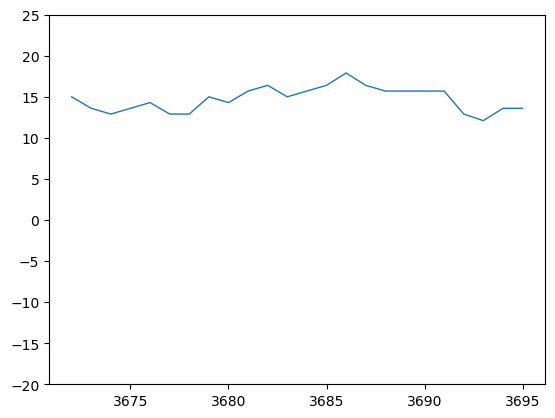

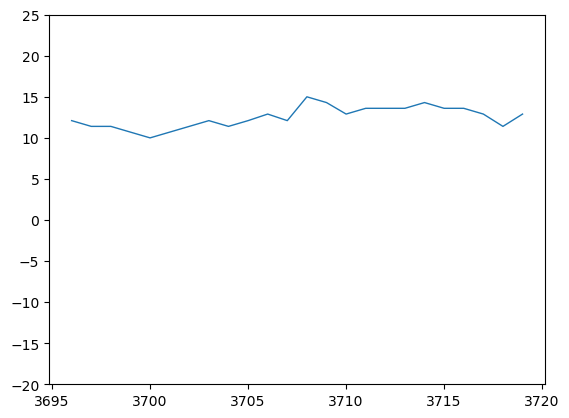

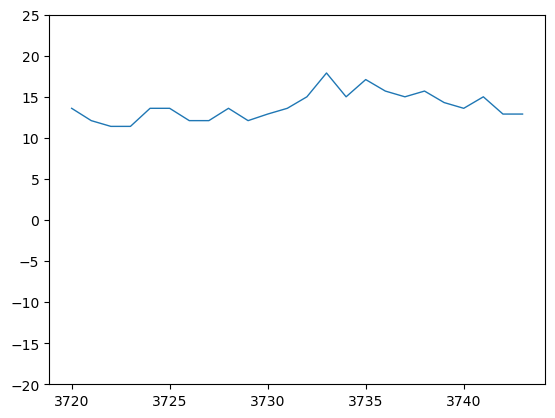

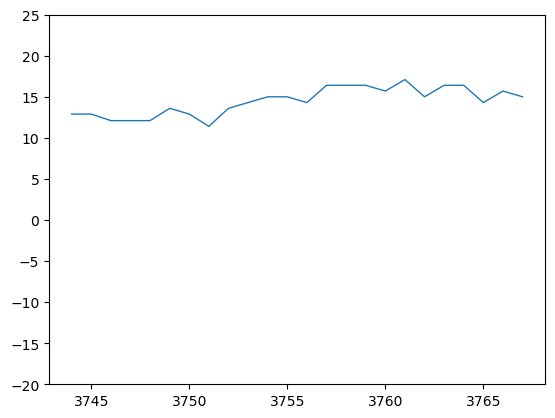

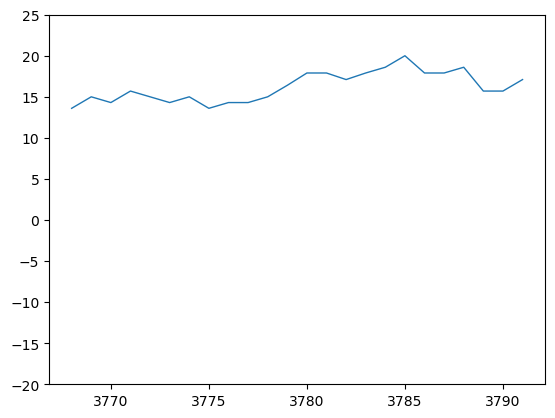

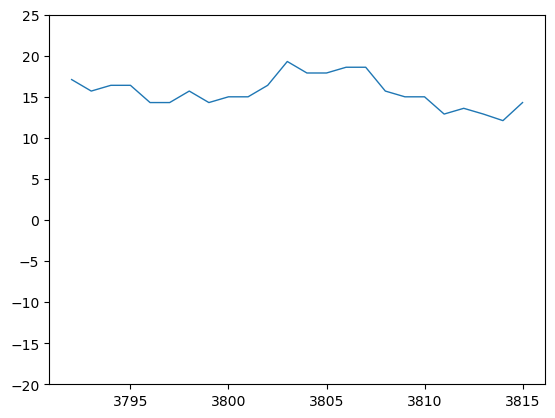

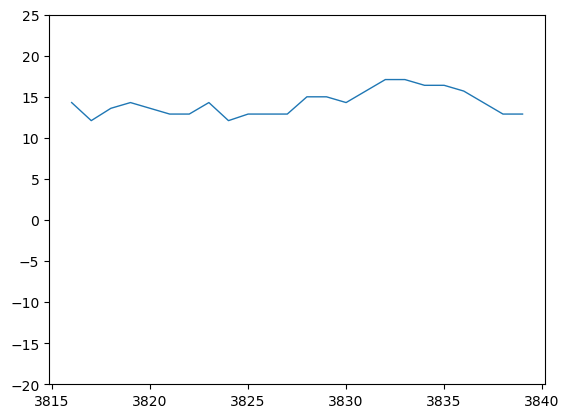

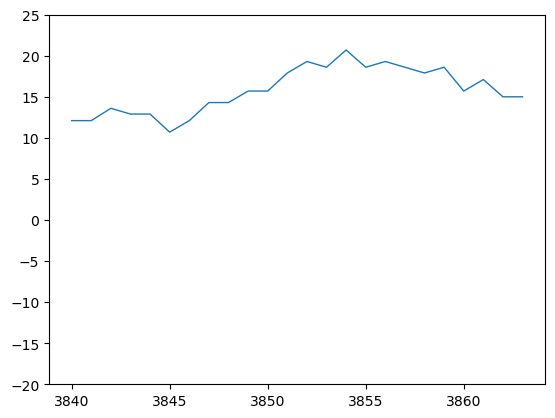

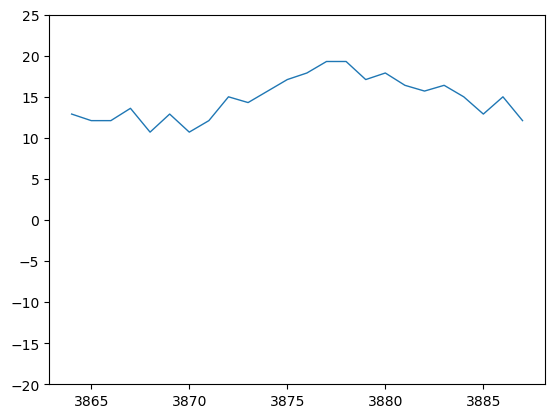

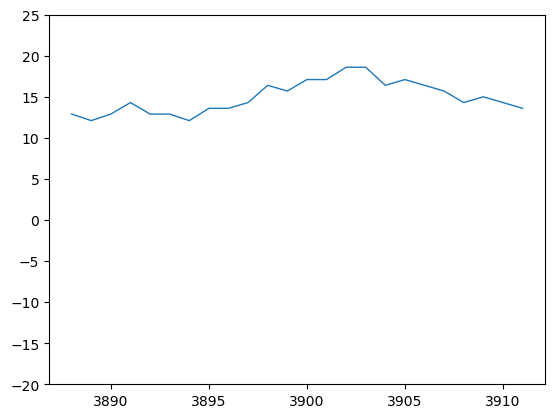

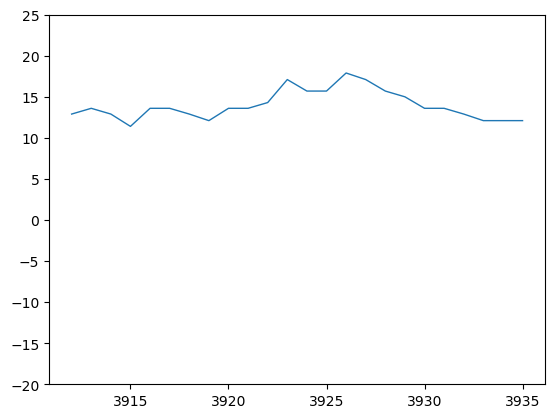

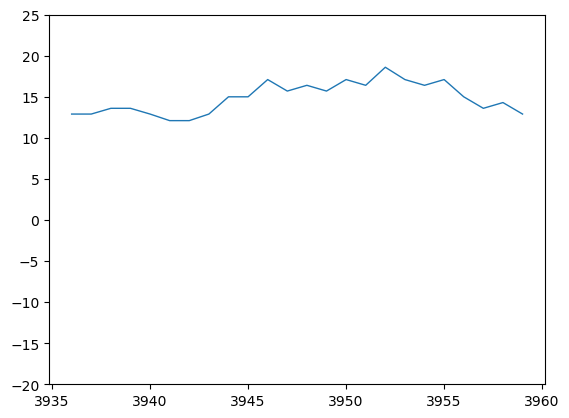

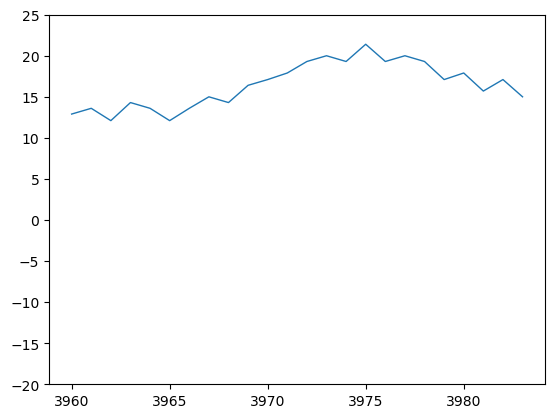

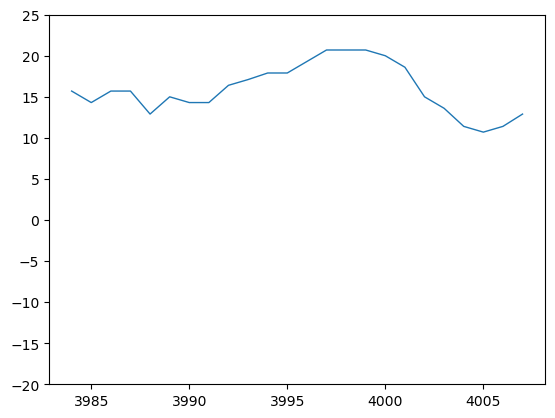

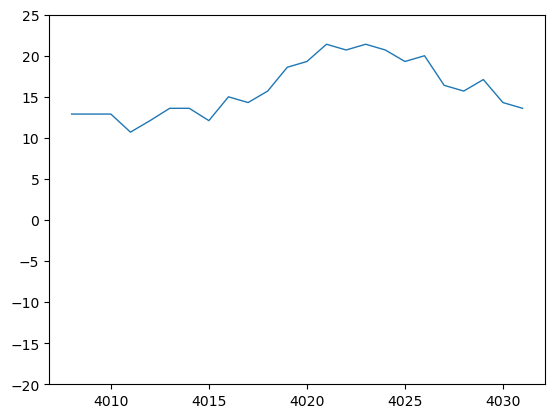

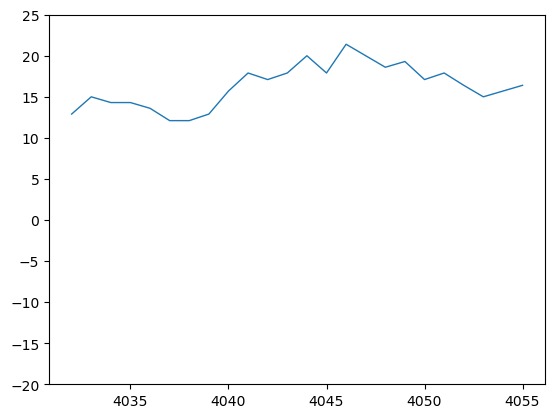

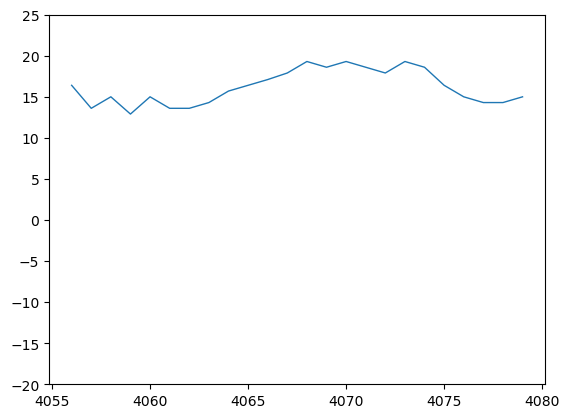

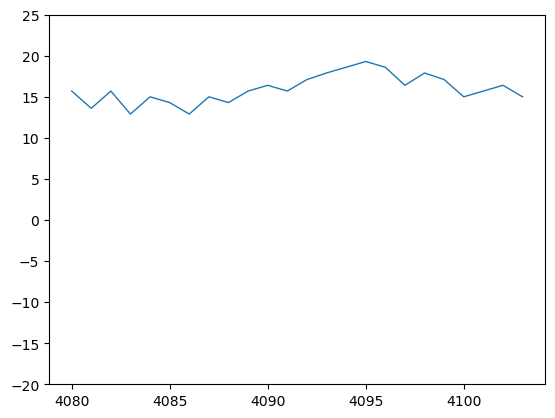

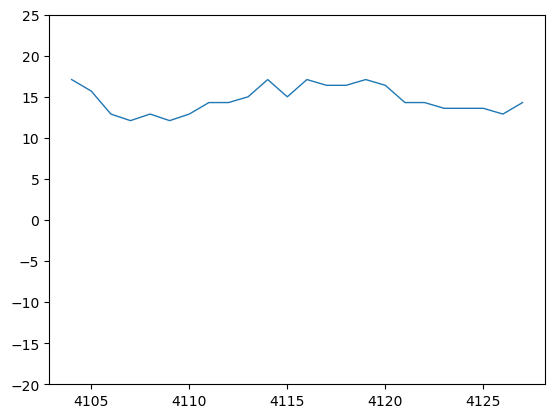

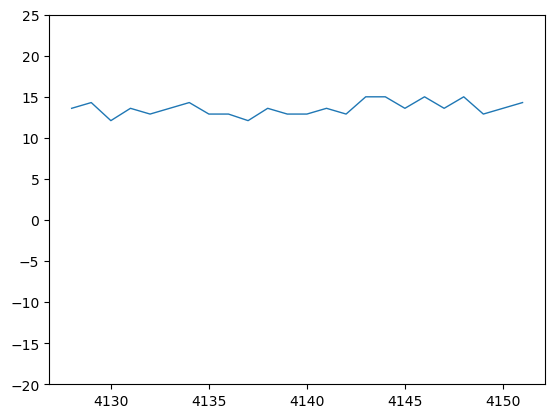

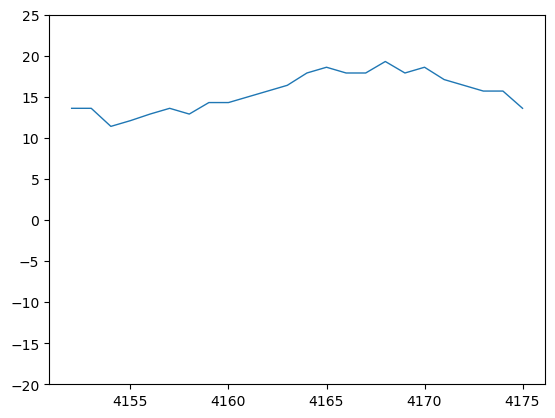

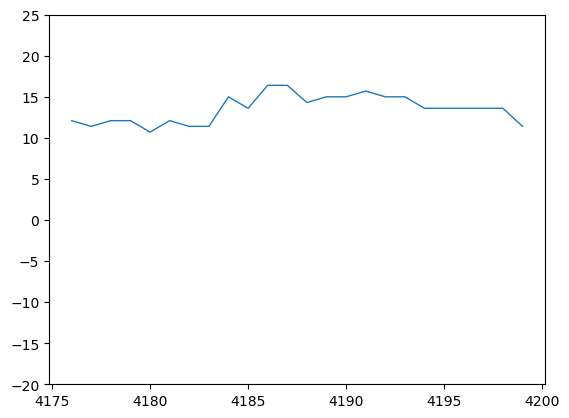

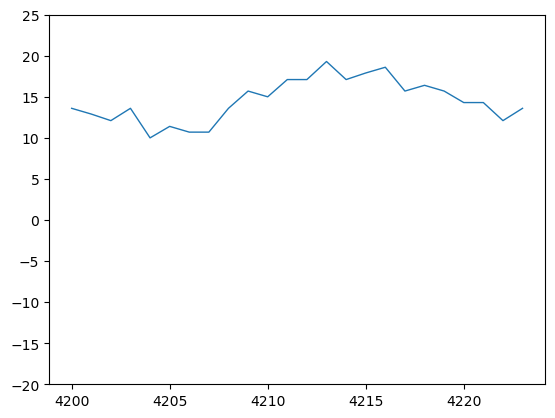

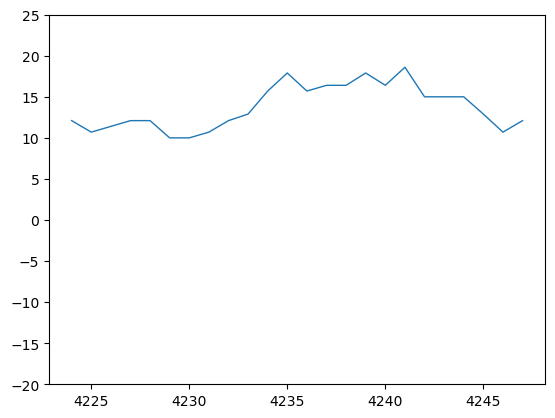

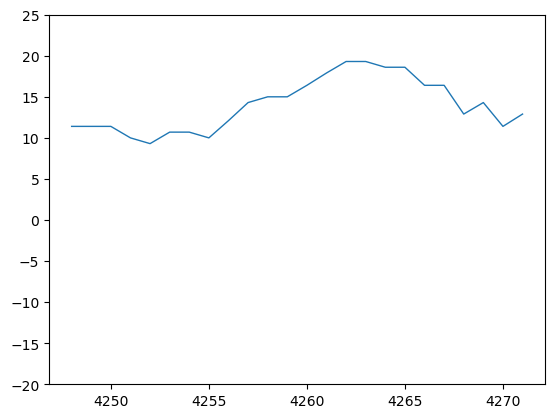

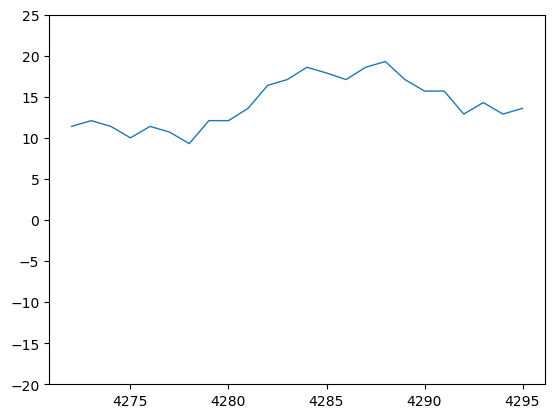

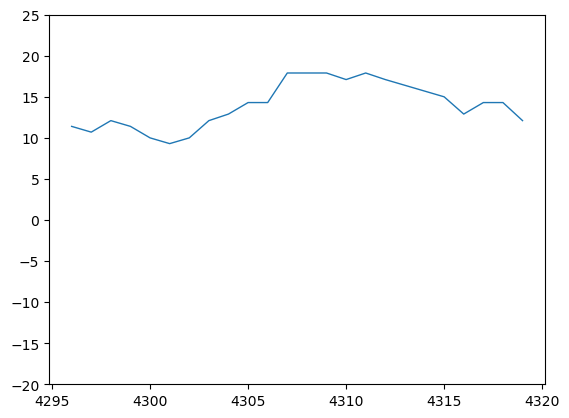

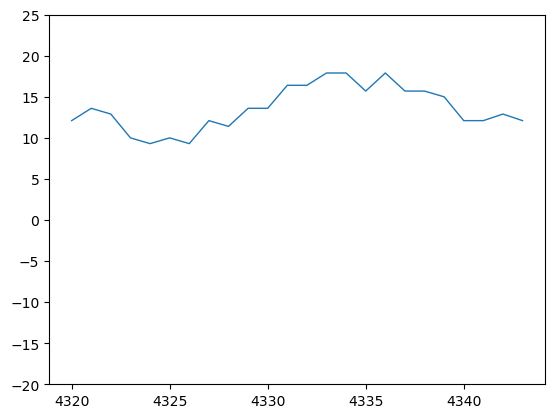

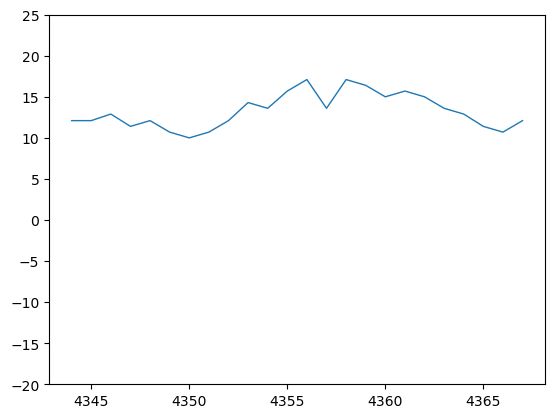

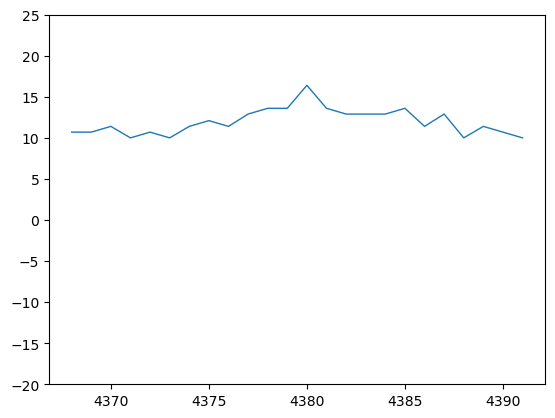

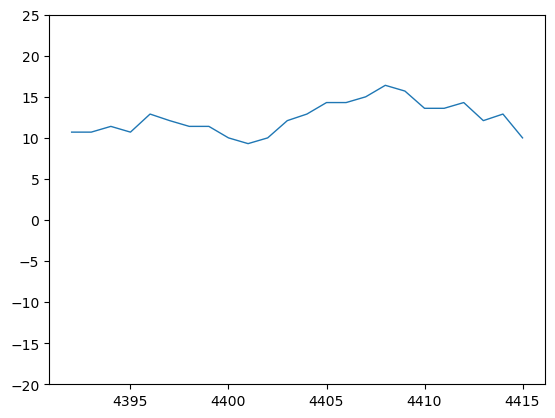

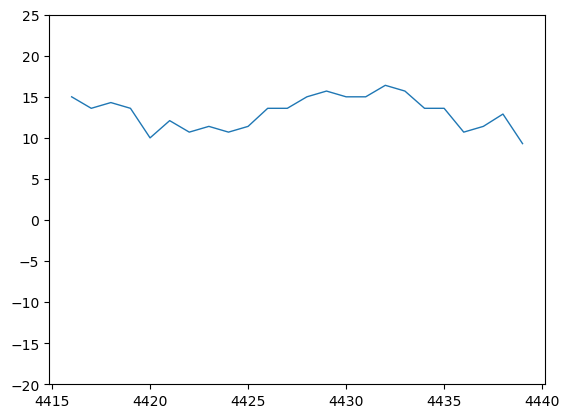

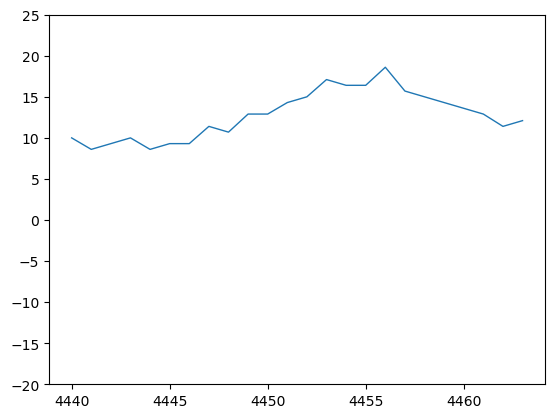

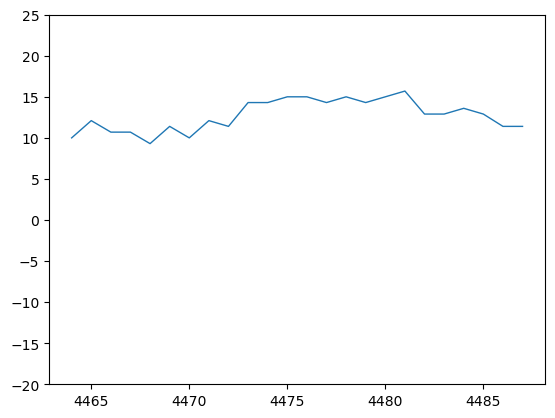

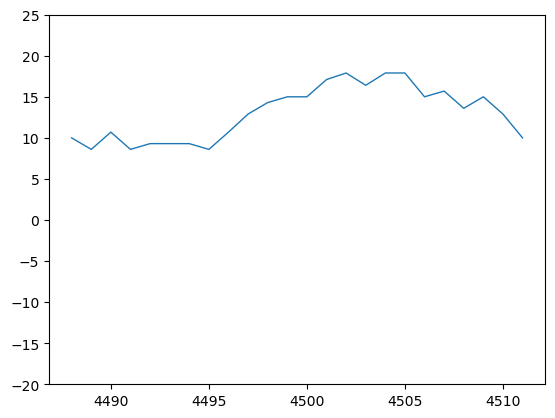

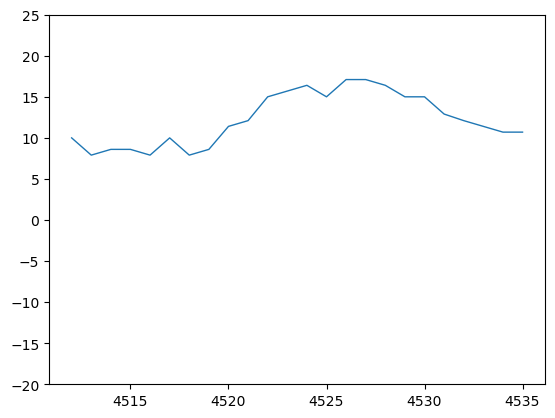

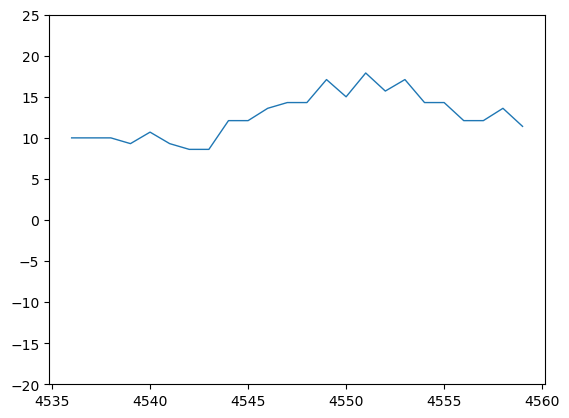

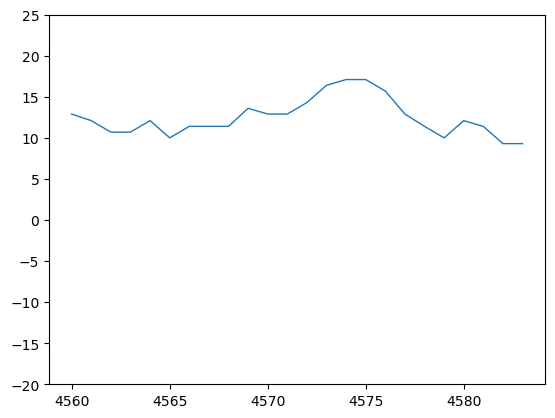

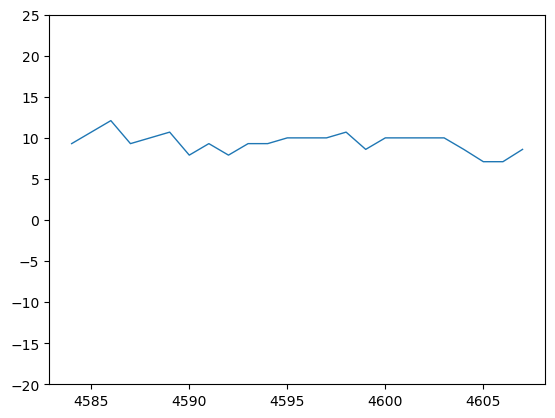

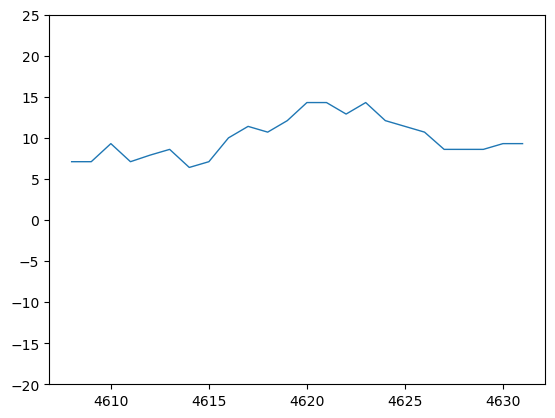

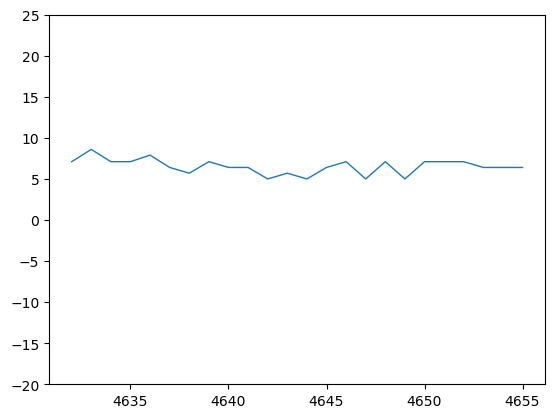

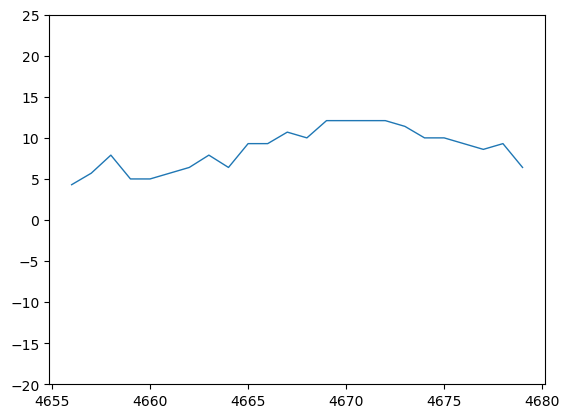

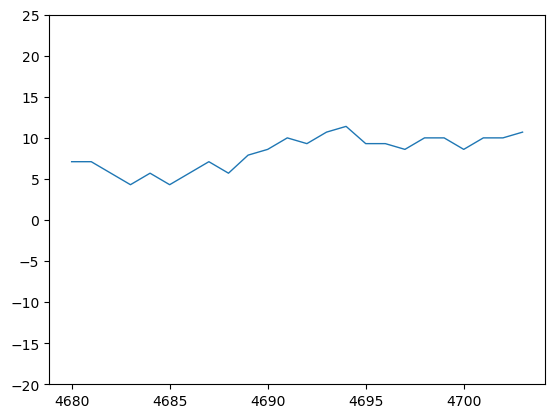

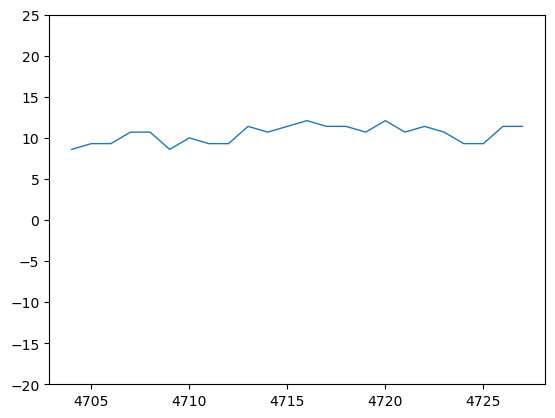

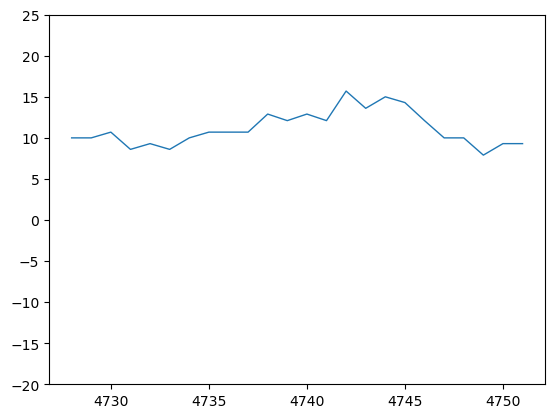

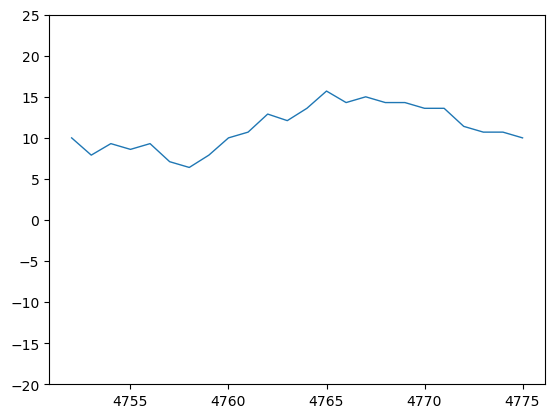

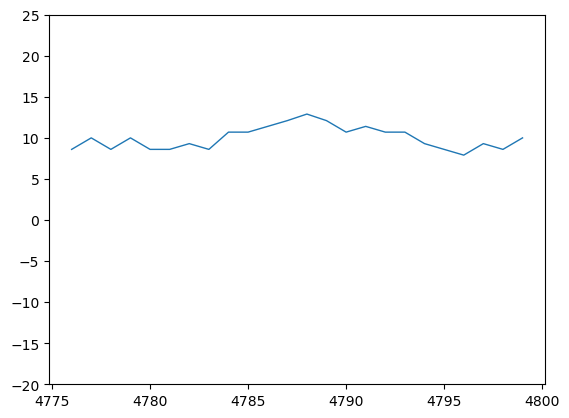

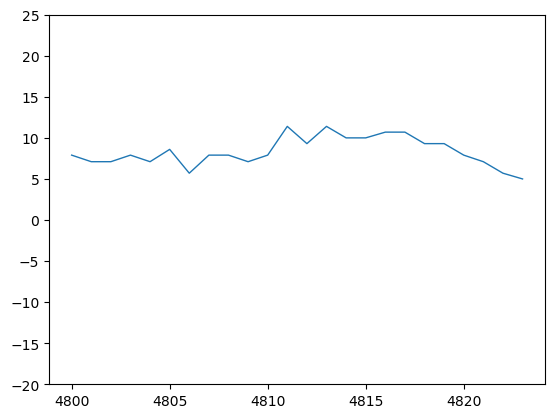

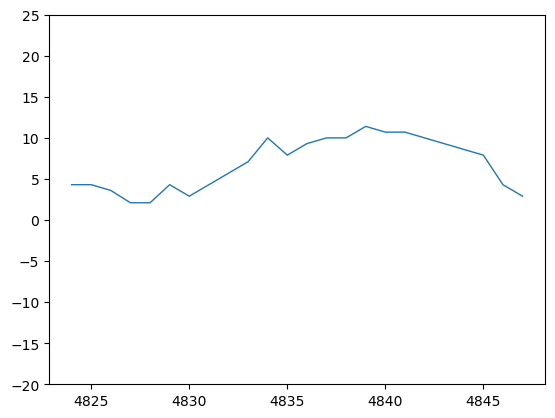

In [ ]:
q = 0
while q < len(train):
    a = 24*q
    b = 24*(q+1)
    plt.plot(range(a,b),train['temperature'][a:b], linewidth=1)
    plt.ylim([-20,25])
    plt.show()
    input()
    q+=1
    

In [26]:
train.describe()

ID   temperature          var1      pressure     windspeed  \
count  26496.000000  26496.000000  26496.000000  26496.000000  26496.000000   
mean   17455.500000      5.098989     -1.916233    986.450615     23.959956   
std    10122.873673      8.682860     10.424860     12.002647     48.280321   
min        0.000000    -17.100000    -32.900000    953.000000      1.075000   
25%     8717.750000     -2.900000    -10.700000    978.000000      3.155000   
50%    17435.500000      6.400000     -1.400000    986.000000      6.545000   
75%    26177.250000     12.100000      7.900000    995.000000     22.260000   
max    34895.000000     23.600000     18.600000   1024.000000    586.600000   

       electricity_consumption            ec            ws          hour  \
count             26496.000000  26496.000000  26496.000000  26496.000000   
mean                298.359601      5.645677      2.198187     11.500000   
std                 108.020555      0.310571      1.281428      6.922317   
min                 174.000000      5.159055      0.072321      0.000000   
25%                 219.000000      5.389072      1.148988      5.750000   
50%                 267.000000      5.587249      1.878701     11.500000   
75%                 342.000000      5.834811      3.102791     17.250000   
max                1386.000000      7.234177      6.374343     23.000000   

              month      ec_shift  
count  26496.000000  26494.000000  
mean       6.500000      5.645699  
std        3.452118      0.310572  
min        1.000000      5.159055  
25%        3.750000      5.389072  
50%        6.500000      5.587249  
75%        9.250000      5.834811  
max       12.000000      7.234177

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(train['windspeed'].to_numpy().reshape(-1,1))

In [28]:
train['windspeed'][np.where(kmeans.labels_ == 1)[0]].min()

110.655

26496